# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

Все предоставленные данные для работы находятся в csv файле.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Изменение-названий-столбцов" data-toc-modified-id="Изменение-названий-столбцов-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Изменение названий столбцов</a></span></li><li><span><a href="#Пропущенные-значения" data-toc-modified-id="Пропущенные-значения-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Пропущенные значения</a></span><ul class="toc-item"><li><span><a href="#Столбец-ceiling_height" data-toc-modified-id="Столбец-ceiling_height-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Столбец <code>ceiling_height</code></a></span></li><li><span><a href="#Столбец-floors_total" data-toc-modified-id="Столбец-floors_total-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Столбец <code>floors_total</code></a></span></li><li><span><a href="#Столбец-is_apartment" data-toc-modified-id="Столбец-is_apartment-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>Столбец <code>is_apartment</code></a></span></li><li><span><a href="#Столбец-living_area" data-toc-modified-id="Столбец-living_area-2.2.4"><span class="toc-item-num">2.2.4&nbsp;&nbsp;</span>Столбец <code>living_area</code></a></span></li><li><span><a href="#Столбец-kitchen_area" data-toc-modified-id="Столбец-kitchen_area-2.2.5"><span class="toc-item-num">2.2.5&nbsp;&nbsp;</span>Столбец <code>kitchen_area</code></a></span></li><li><span><a href="#Столбец-balcony" data-toc-modified-id="Столбец-balcony-2.2.6"><span class="toc-item-num">2.2.6&nbsp;&nbsp;</span>Столбец <code>balcony</code></a></span></li><li><span><a href="#Столбец-locality_name" data-toc-modified-id="Столбец-locality_name-2.2.7"><span class="toc-item-num">2.2.7&nbsp;&nbsp;</span>Столбец <code>locality_name</code></a></span></li><li><span><a href="#Столбец-airports_nearest" data-toc-modified-id="Столбец-airports_nearest-2.2.8"><span class="toc-item-num">2.2.8&nbsp;&nbsp;</span>Столбец <code>airports_nearest</code></a></span></li><li><span><a href="#Столбец-city_centers_nearest" data-toc-modified-id="Столбец-city_centers_nearest-2.2.9"><span class="toc-item-num">2.2.9&nbsp;&nbsp;</span>Столбец <code>city_centers_nearest</code></a></span></li><li><span><a href="#Столбец-parks_around_3000" data-toc-modified-id="Столбец-parks_around_3000-2.2.10"><span class="toc-item-num">2.2.10&nbsp;&nbsp;</span>Столбец <code>parks_around_3000</code></a></span></li><li><span><a href="#Столбец-parks_nearest" data-toc-modified-id="Столбец-parks_nearest-2.2.11"><span class="toc-item-num">2.2.11&nbsp;&nbsp;</span>Столбец <code>parks_nearest</code></a></span></li><li><span><a href="#Столбец-ponds_around_3000" data-toc-modified-id="Столбец-ponds_around_3000-2.2.12"><span class="toc-item-num">2.2.12&nbsp;&nbsp;</span>Столбец <code>ponds_around_3000</code></a></span></li><li><span><a href="#Столбец-ponds_nearest" data-toc-modified-id="Столбец-ponds_nearest-2.2.13"><span class="toc-item-num">2.2.13&nbsp;&nbsp;</span>Столбец <code>ponds_nearest</code></a></span></li><li><span><a href="#Столбец-days_exposition" data-toc-modified-id="Столбец-days_exposition-2.2.14"><span class="toc-item-num">2.2.14&nbsp;&nbsp;</span>Столбец <code>days_exposition</code></a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.2.15"><span class="toc-item-num">2.2.15&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Типы-данных" data-toc-modified-id="Типы-данных-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Типы данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Дубликаты" data-toc-modified-id="Дубликаты-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Дубликаты</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.0.1"><span class="toc-item-num">3.0.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Площадь-квартиры" data-toc-modified-id="Площадь-квартиры-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Площадь квартиры</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Общая-стоимость-квартиры" data-toc-modified-id="Общая-стоимость-квартиры-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Общая стоимость квартиры</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Стоимость-квадратного-метра" data-toc-modified-id="Стоимость-квадратного-метра-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Стоимость квадратного метра</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Число-комнат" data-toc-modified-id="Число-комнат-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Число комнат</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.4.1"><span class="toc-item-num">4.4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Высота-потолков" data-toc-modified-id="Высота-потолков-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Высота потолков</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.5.1"><span class="toc-item-num">4.5.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Кол-во-дней-выставления-объявлений" data-toc-modified-id="Кол-во-дней-выставления-объявлений-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Кол-во дней выставления объявлений</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.6.1"><span class="toc-item-num">4.6.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li></ul></li><li><span><a href="#Зависимости" data-toc-modified-id="Зависимости-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Зависимости</a></span><ul class="toc-item"><li><span><a href="#Зависимость-цены-от-площади" data-toc-modified-id="Зависимость-цены-от-площади-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Зависимость цены от площади</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Зависимость-цены-от-количества-комнат" data-toc-modified-id="Зависимость-цены-от-количества-комнат-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Зависимость цены от количества комнат</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Зависимость-цены-от-удаленности-от-центра" data-toc-modified-id="Зависимость-цены-от-удаленности-от-центра-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Зависимость цены от удаленности от центра</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5.3.1"><span class="toc-item-num">5.3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Зависимость-цены-от-этажности" data-toc-modified-id="Зависимость-цены-от-этажности-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Зависимость цены от этажности</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5.4.1"><span class="toc-item-num">5.4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Зависимость-цены-от-дня-недели-размещения-объявления" data-toc-modified-id="Зависимость-цены-от-дня-недели-размещения-объявления-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Зависимость цены от дня недели размещения объявления</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5.5.1"><span class="toc-item-num">5.5.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Зависимость-цены-от-месяца-размещения-объявления" data-toc-modified-id="Зависимость-цены-от-месяца-размещения-объявления-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>Зависимость цены от месяца размещения объявления</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5.6.1"><span class="toc-item-num">5.6.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Зависимость-цены-от-года-размещения-объявления" data-toc-modified-id="Зависимость-цены-от-года-размещения-объявления-5.7"><span class="toc-item-num">5.7&nbsp;&nbsp;</span>Зависимость цены от года размещения объявления</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5.7.1"><span class="toc-item-num">5.7.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Объединенная-heatmap-карта-корреляций-данных" data-toc-modified-id="Объединенная-heatmap-карта-корреляций-данных-5.8"><span class="toc-item-num">5.8&nbsp;&nbsp;</span>Объединенная heatmap карта корреляций данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5.8.1"><span class="toc-item-num">5.8.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li></ul></li><li><span><a href="#Зависимость-цены-квадратного-метра-от-населенного-пункта" data-toc-modified-id="Зависимость-цены-квадратного-метра-от-населенного-пункта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Зависимость цены квадратного метра от населенного пункта</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-6.0.1"><span class="toc-item-num">6.0.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li></ul></li><li><span><a href="#Квартиры-Санкт-Петербурга" data-toc-modified-id="Квартиры-Санкт-Петербурга-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Квартиры Санкт-Петербурга</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-7.0.1"><span class="toc-item-num">7.0.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Центр-Санкт-Петербурга" data-toc-modified-id="Центр-Санкт-Петербурга-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Центр Санкт-Петербурга</a></span><ul class="toc-item"><li><span><a href="#Стоимость-кв.м.-в-центре-СПБ" data-toc-modified-id="Стоимость-кв.м.-в-центре-СПБ-7.1.1"><span class="toc-item-num">7.1.1&nbsp;&nbsp;</span>Стоимость кв.м. в центре СПБ</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-7.1.2"><span class="toc-item-num">7.1.2&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Площадь-квартир-в-центре-СПБ" data-toc-modified-id="Площадь-квартир-в-центре-СПБ-7.1.3"><span class="toc-item-num">7.1.3&nbsp;&nbsp;</span>Площадь квартир в центре СПБ</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-7.1.4"><span class="toc-item-num">7.1.4&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Стоимость-квартир-в-центре-СПБ" data-toc-modified-id="Стоимость-квартир-в-центре-СПБ-7.1.5"><span class="toc-item-num">7.1.5&nbsp;&nbsp;</span>Стоимость квартир в центре СПБ</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-7.1.6"><span class="toc-item-num">7.1.6&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Число-комнат-в-квартирах-в-центре-СПБ" data-toc-modified-id="Число-комнат-в-квартирах-в-центре-СПБ-7.1.7"><span class="toc-item-num">7.1.7&nbsp;&nbsp;</span>Число комнат в квартирах в центре СПБ</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-7.1.7.1"><span class="toc-item-num">7.1.7.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Высота-потолков-в-квартирах-в-центре-СПБ" data-toc-modified-id="Высота-потолков-в-квартирах-в-центре-СПБ-7.1.8"><span class="toc-item-num">7.1.8&nbsp;&nbsp;</span>Высота потолков в квартирах в центре СПБ</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-7.1.9"><span class="toc-item-num">7.1.9&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Факторы-влияющие-на-стоимость-квартиры" data-toc-modified-id="Факторы-влияющие-на-стоимость-квартиры-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Факторы влияющие на стоимость квартиры</a></span><ul class="toc-item"><li><span><a href="#Влияние-числа-комнат-на-стоимость-квартиры" data-toc-modified-id="Влияние-числа-комнат-на-стоимость-квартиры-7.2.1"><span class="toc-item-num">7.2.1&nbsp;&nbsp;</span>Влияние числа комнат на стоимость квартиры</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-7.2.1.1"><span class="toc-item-num">7.2.1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Влияние-этажа-квартиры-на-ее-стоимость" data-toc-modified-id="Влияние-этажа-квартиры-на-ее-стоимость-7.2.2"><span class="toc-item-num">7.2.2&nbsp;&nbsp;</span>Влияние этажа квартиры на ее стоимость</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-7.2.2.1"><span class="toc-item-num">7.2.2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Влияние-удаленности-от-центра-на-стоимость-квартиры" data-toc-modified-id="Влияние-удаленности-от-центра-на-стоимость-квартиры-7.2.3"><span class="toc-item-num">7.2.3&nbsp;&nbsp;</span>Влияние удаленности от центра на стоимость квартиры</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-7.2.3.1"><span class="toc-item-num">7.2.3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Влияние-дат-размещения-на-стоимость-квартиры" data-toc-modified-id="Влияние-дат-размещения-на-стоимость-квартиры-7.2.4"><span class="toc-item-num">7.2.4&nbsp;&nbsp;</span>Влияние дат размещения на стоимость квартиры</a></span><ul class="toc-item"><li><span><a href="#Влияние-дня-недели-размещения-на-стоимость-квартиры" data-toc-modified-id="Влияние-дня-недели-размещения-на-стоимость-квартиры-7.2.4.1"><span class="toc-item-num">7.2.4.1&nbsp;&nbsp;</span>Влияние дня недели размещения на стоимость квартиры</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-7.2.4.2"><span class="toc-item-num">7.2.4.2&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Влияние-месяца-размещения-на-стоимость-квартиры" data-toc-modified-id="Влияние-месяца-размещения-на-стоимость-квартиры-7.2.4.3"><span class="toc-item-num">7.2.4.3&nbsp;&nbsp;</span>Влияние месяца размещения на стоимость квартиры</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-7.2.4.4"><span class="toc-item-num">7.2.4.4&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Влияние-года-размещения-на-стоимость-квартиры" data-toc-modified-id="Влияние-года-размещения-на-стоимость-квартиры-7.2.4.5"><span class="toc-item-num">7.2.4.5&nbsp;&nbsp;</span>Влияние года размещения на стоимость квартиры</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-7.2.4.6"><span class="toc-item-num">7.2.4.6&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Изучение данных из файла

Импортируем необходимые библиотеки

In [1]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Подгрузим данные

In [2]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t', decimal='.') #сохраним данные в dataframe - df
pd.set_option('display.max_columns', None) #настроим вывод таблиц, чтобы выходили все колонки
pd.set_option('display.float_format', lambda x: '%.2f' % x) #настроим вывод float чисел, в дробной части оставим 2 знака
df.head() #выведим первые 5 строк таблицы

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.00,108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,NaN
1,7,3350000.00,40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,NaN,False,False,11.00,2.00,посёлок Шушары,12817.00,18603.00,0.00,NaN,0.00,NaN,81.00
2,10,5196000.00,56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,NaN,False,False,8.30,0.00,Санкт-Петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558.00
3,0,64900000.00,159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,NaN,False,False,NaN,0.00,Санкт-Петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424.00
4,2,10000000.00,100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121.00


Выведим общую информацию

In [3]:
df.info() # выведим основную информацию методом info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Мы видим, что часть названий столбцов прописанны не по правилам/рекомедациям PEP8. Сразу сделаем названия правильно.

### Вывод

Мы успешно сохранили данные в датафрейм df. База состоит из 23698 строк и 22 колонки. Есть колонки с пропущенными значениями. Ряд колонок написаны не с соблюдением рекомендаций PEP8.

## Предобработка данных

### Изменение названий столбцов

Внесем исправления в названия колонок.

In [4]:
df = df.rename(columns={'cityCenters_nearest': 'city_centers_nearest', 'parks_around3000': 'parks_around_3000', 'ponds_around3000': 'ponds_around_3000'})

### Пропущенные значения

Проверим наличие пропущенных значений и в каких колонках они присутствуют.

In [5]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Вывод показывает, что в 14 столбцах  очень много пропущенных значений. 

Причины пропусков могут быть разными. Например, расстояния до объектов это технические данные, скорее всего это произошло из-за не совершенства системы вычислений расстояний. В связи с этим и наличие парков и водоемов, можно отнести к этому.

Аппартаменты или нет, скорее всего вышла из-за того, тут два варианта да или нет. Тут многое зависит от пользователя, скорее всего у него были не аппартаменты, а квартира, поэтому пользователь пропустил ответ. Вероятнее всего ее можно было бы исключить дав на выбор ответ да или нет, либо установить по умолчанию нет и т.п.

Подобное, как с аппартаментами и наличие балконов.

Высота потолков, и других пропущенных площадей, возможно пользователи не могли найти эти данные при заполнении и пропустили.

Высоту потолков, можно было бы технически автоматизировать, используя базу типовых проектов домов. И предлагать пользователю, подтвердить правильно или нет.

Количество дней размещения, были пропущенны, вероятнее всего из-за того, что на момент выгрузки, пользователи еще не продали свои квартиры.

Начнем пошагово разбираться и там где можно заполнять.

#### Столбец `ceiling_height`

Столбец `ceiling_height`- *высота потолков*, 9195 пропущенных значений. Так как отсутствуют данные с которыми мы можем связать высоту потолков, применим к пропущенным значениям, либо среднюю величину, либо медиану. Сделаем обзор значений по столбцу с высотой потолков.

In [6]:
df.ceiling_height.describe()

count   14504.00
mean        2.77
std         1.26
min         1.00
25%         2.52
50%         2.65
75%         2.80
max       100.00
Name: ceiling_height, dtype: float64

Выведим для полноты информации гистограмму.

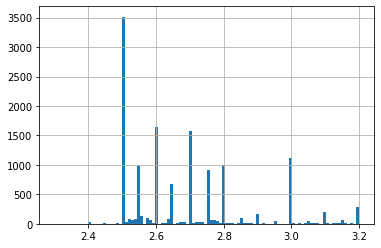

In [7]:
df['ceiling_height'].hist(bins=100, range=(2.3, 3.2)); #отрезок выберим от 2,4м до 3,2м т.к. в этой области размещенно большая часть высот

Как видим, основная часть высот составляет 2.5м. Применим к пропущенным ячейкам это значение.

In [8]:
df['ceiling_height'] = df['ceiling_height'].fillna(2.5)

#### Столбец `floors_total`

Столбец `floors_total`- *всего этажей в доме*, 86 пропущенных значений.

In [9]:
df['floors_total'].describe()

count   23613.00
mean       10.67
std         6.60
min         1.00
25%         5.00
50%         9.00
75%        16.00
max        60.00
Name: floors_total, dtype: float64

Заменить их средними значениями будет неправильно, т.к. может получиться так, что этажей в доме 10, а квартира на 12 и т.п., так же как и если бы мы заполнили значением 0. 

Сделаем так, что этажность дома будет текущая этажность квартиры в доме +1. Плюсуем единицу т.к. мы еще не знаем, как сильно влияет на стоимость последний этаж, если поймем, что последний этаж ни как не влияет на стоимость и при необходимости, можно будет в любое время скорректировать.

In [10]:
df.loc[df['floors_total'].isna(), 'floors_total'] = df.loc[df['floors_total'].isna(), 'floor'] + 1

#### Столбец `is_apartment`

`is_apartment` - апартаменты или нет. 20924 пропущенных значений. 

Вероятнее всего, что если не указали, что это аппартаменты, то это не аппартаменты. Поэтому заполним пропущенные ячейки значением False.

In [11]:
df['is_apartment'] = df['is_apartment'].fillna(False)

#### Столбец `living_area`

`living_area`  - жилая площадь. 1903 пропущенных значений.

Т.к. доля пропущенных значений составляет небольшую долю порядка 8%, при заполнении будем исходить из средней доли жилой площади в известных нам значениях.

Проверим гипотезу на корреляциии между общей площадью и жилой площадью.

In [12]:
df['total_area'].corr(df['living_area'])

0.9395373338721492

Действительно корреляция подтверждает нашу гипотезу.

Разделим жилую площадь на общую площадь и эту долю умножим на общую площадь.

In [13]:
df['living_area'] = round(df['living_area'].fillna(df['total_area'] * (df['living_area'] / df['total_area']).mean()), 1)

#### Столбец `kitchen_area`

`kitchen_area` - площадь кухни. 2278 пропущенных значений.


Проверим гипотезу с жилой площадью на кухонной площадью, на корреляции. 

In [14]:
df['total_area'].corr(df['kitchen_area'])

0.6091211711198312

Да, гипотеза и здесь подтверждается.

С пропущенными значениями площади кухни поступим аналогично с жилой площадью.

In [15]:
df['kitchen_area'] = round(df['kitchen_area'].fillna(df['total_area'] * (df['kitchen_area'] / df['total_area']).mean()), 1)

#### Столбец `balcony`

`balcony` - наличие балкона. 11519 пропущенных значений. Вполне вероятно, что если не указали кол-во балконов, то их скорее всего и нет. Поэтому заполним пропущенные ячейки значением 0.

In [16]:
df['balcony'] = df['balcony'].fillna(0)

#### Столбец `locality_name`

`locality_name` - населенный пункт. 49 пропущенных значений.

In [17]:
df['locality_name'].value_counts() #проверим в каких населенных пунктах, сколько объявлений методом value_counts()

Санкт-Петербург              15721
посёлок Мурино                 522
посёлок Шушары                 440
Всеволожск                     398
Пушкин                         369
                             ...  
поселок Лисий Нос                1
деревня Реброво                  1
деревня Шпаньково                1
деревня Лупполово                1
коттеджный посёлок Лесное        1
Name: locality_name, Length: 364, dtype: int64

Т.к. значений совсем мало всего 49 строк, а подавляющее число объявлений из Санкт-Петербурга, то не будет ошибочным, если мы пропущенные значения в этом столбце, добавим к Санкт-Петербургу.

In [18]:
df['locality_name'] = df['locality_name'].fillna('Санкт-Петербург')

#### Столбец `airports_nearest`

`airports_nearest` - расстояние до аэропорта. 5542 пропущенных значений.


Выведим с каких населенных пунктов пропущенные значения по расстоянию до аэропорта.

In [19]:
#используем фильтр по пропущенным и по столбцу locality_name с использованием метода value_counts() посчитаем. 
#Выведим первые 10 населенных пункта
df[df['airports_nearest'].isna()]['locality_name'].value_counts().head(10) 

посёлок Мурино             522
Всеволожск                 398
Гатчина                    307
деревня Кудрово            299
Выборг                     237
Кудрово                    173
деревня Новое Девяткино    144
Сертолово                  142
Кириши                     125
Сланцы                     112
Name: locality_name, dtype: int64

Мы видим, что подавляющая часть из Ленинградской области. Оставим в данном столбце пропущенные значения.

#### Столбец `city_centers_nearest`

`city_centers_nearest` - расстояние до центра. 5519 пропущенных значений.


Аналогично предыдущему расчету выведим первую десятку населенных пунктов с пропущенными значениями в столбце `city_centers_nearest`

In [20]:
df[df['city_centers_nearest'].isna()]['locality_name'].value_counts().head(10)

посёлок Мурино             522
Всеволожск                 398
Гатчина                    307
деревня Кудрово            299
Выборг                     237
Кудрово                    173
деревня Новое Девяткино    144
Сертолово                  142
Кириши                     125
Сланцы                     112
Name: locality_name, dtype: int64

Как видим, первая десятка это населенные пункты в Ленинградской области, скорее всего и остальные насел. пункты в основном из Ленинградской области. Поэтому, мы пока не будем заполнять пропущенные значения колонки `city_centers_nearest`

#### Столбец `parks_around_3000`

`parks_around_3000` - число парков в 3000 м.  5518 пропущенных значений. Вероятнее всего, что если при заполнении не указали кол-во парков на расстоянии 3000 метров, то их, скорее всего, нет. 

Проверим гипотезу, посмотрев есть ли по данным колонки `parks_nearest` есть ли ближе 3000 парки.

In [21]:
df[(df['parks_around_3000'].isna()) & (df['parks_nearest'] < 3000)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition


Гипотеза подтвердилась. На расстоянии менее 3000 метров от квартиры парки отсутствуют.

Поэтому заполним пропущенные ячейки значением 0.

In [22]:
df['parks_around_3000'] = df['parks_around_3000'].fillna(0)

#### Столбец `parks_nearest`

`parks_nearest`  - расстояние до ближайшего парка.  15620 пропущенных значений.


Посмотрим много ли парков на расстоянии более 3000 указано в объявлениях.

In [23]:
df[df['parks_nearest'] > 3000]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
1590,3,7500000.00,70.00,2017-07-11T00:00:00,2,2.50,18.00,37.00,13,False,False,False,10.00,0.00,Санкт-Петербург,14878.00,9791.00,0.00,3064.00,1.00,264.00,4.00
10959,9,3000000.00,31.10,2017-03-21T00:00:00,1,2.50,5.00,17.70,2,False,False,False,5.50,0.00,Санкт-Петербург,14821.00,9734.00,0.00,3190.00,1.00,431.00,234.00
19208,17,14950000.00,187.00,2017-10-12T00:00:00,5,3.00,2.00,80.00,2,False,False,False,17.00,1.00,Санкт-Петербург,36805.00,8656.00,0.00,3013.00,3.00,537.00,49.00
19430,9,3900000.00,30.50,2018-02-22T00:00:00,1,2.60,5.00,16.50,1,False,False,False,5.50,0.00,Санкт-Петербург,14821.00,9734.00,0.00,3190.00,1.00,431.00,176.00


Мы видим, что объявлений таких только 4 шт.

In [24]:
df['parks_nearest'].describe()

count   8079.00
mean     490.80
std      342.32
min        1.00
25%      288.00
50%      455.00
75%      612.00
max     3190.00
Name: parks_nearest, dtype: float64

Почти все указанные значения в данном столбце до 3000 метров. 

Судя по всему, те которые пустые значения они более 3000.  Очевидно, что если расстояние более 3 км, то скорее всего это мало повлияет на стоимость жилья.

Пока оставим в данном столбце пустые значения.

#### Столбец `ponds_around_3000`

`ponds_around_3000` - число водоемов в 3000 м. 5518 пропущенных значений. 

Аналогично предыдущим расчетам и гипотезам, вероятнее всего, что если не указали кол-во водоемов на расстоянии 3000 метров, то их нет. 

Проверим гипотезу, посмотрев есть ли по данным колонки `ponds_nearest` есть ли ближе 3000 водоемы.

In [25]:
df[(df['ponds_around_3000'].isna()) & (df['ponds_nearest'] < 3000)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition


Гипотеза подтвердилась. Поэтому заполним пропущенные ячейки значением 0.

In [26]:
df['ponds_around_3000'] = df['ponds_around_3000'].fillna(0)

#### Столбец `ponds_nearest`

`ponds_nearest` - расстояние до ближайшего водоема. 14589 пропущенных значений.


Выведим информацию по этому столбцу по его значениям.

In [27]:
df['ponds_nearest'].describe()

count   9110.00
mean     517.98
std      277.72
min       13.00
25%      294.00
50%      502.00
75%      729.00
max     1344.00
Name: ponds_nearest, dtype: float64

Все указанные значения в данном столбце менее 3000 метров. Судя по всему, те которые пустые значения они более 3000. 

Пока оставим в данном столбце пустые значения.

#### Столбец `days_exposition`

`days_exposition` - сколько дней было размещено объявление. 3181 пропущенных значений. 

Вероятнее всего, что столько много значений связано с тем, что часть людей либо забыла снять с публикации, либо на момент выгрузки еще не продали свою квартиру.

In [28]:
df['days_exposition'].value_counts().head(10)

45.00    880
60.00    538
7.00     234
30.00    208
90.00    204
4.00     176
3.00     158
5.00     152
14.00    148
9.00     143
Name: days_exposition, dtype: int64

Мы могли бы зафиксировать значения текущим днем выгрузки базы, либо указать среднее или медианое значение. Однако мы его не знаем причину того почему они "висят". 

В связи с этим пока оставим пропущенные значения в этом столбце.

#### Вывод

Мы успешно проделали работу. Заменили пропущенные значения на те которые возможны. И обоснованно, оставили пропущенные значения в 5 столбцах.

Выведим текущее состояние данных по пропущенным значениям.

In [29]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000           0
parks_nearest           15620
ponds_around_3000           0
ponds_nearest           14589
days_exposition          3181
dtype: int64

### Типы данных

In [30]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.00,108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,False,False,False,25.00,0.00,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,NaN
1,7,3350000.00,40.40,2018-12-04T00:00:00,1,2.50,11.00,18.60,1,False,False,False,11.00,2.00,посёлок Шушары,12817.00,18603.00,0.00,NaN,0.00,NaN,81.00
2,10,5196000.00,56.00,2015-08-20T00:00:00,2,2.50,5.00,34.30,4,False,False,False,8.30,0.00,Санкт-Петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558.00
3,0,64900000.00,159.00,2015-07-24T00:00:00,3,2.50,14.00,89.80,9,False,False,False,29.80,0.00,Санкт-Петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424.00
4,2,10000000.00,100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,False,False,False,41.00,0.00,Санкт-Петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121.00


Изменим тип колонок `balcony`, `last_price`, `parks_around_3000` и `ponds_around_3000` c float на int

In [31]:
df['balcony'] = df['balcony'].astype(int)
df['parks_around_3000'] = df['parks_around_3000'].astype(int)
df['ponds_around_3000'] = df['ponds_around_3000'].astype(int)
df['last_price'] = df['last_price'].astype(int)

Колонку `first_day_exposition` переведем в более понятную и правильную (*datetime*) для нас вид и формат даты.

In [32]:
df['first_day_exposition_prime'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

#### Вывод

Мы успешно перевели типы данных в нужный нам формат.

Выведим текущие значения типов данных по столбцам.

In [33]:
df.dtypes

total_images                           int64
last_price                             int64
total_area                           float64
first_day_exposition                  object
rooms                                  int64
ceiling_height                       float64
floors_total                         float64
living_area                          float64
floor                                  int64
is_apartment                            bool
studio                                  bool
open_plan                               bool
kitchen_area                         float64
balcony                                int64
locality_name                         object
airports_nearest                     float64
city_centers_nearest                 float64
parks_around_3000                      int64
parks_nearest                        float64
ponds_around_3000                      int64
ponds_nearest                        float64
days_exposition                      float64
first_day_

### Дубликаты

Проверим данные на дубликаты.

In [34]:
df.duplicated().sum()

0

Дубликатов нет.

### Вывод

Пропуски обработаны там, где это возможно. Типы данных скорректированы. Данные подготовлены к дальнейшему анализу.

## Расчёты и добавление результатов в таблицу

Добавим столбец со стоимостью квадратного метра, сохраним это в столбце `cost_square_meter`

In [35]:
df['cost_square_meter'] = df['last_price'] / df['total_area']
df['cost_square_meter'] = df['cost_square_meter'].astype(int)

Добавим столбцы с днем недели, месяца и года публикации объявления, сохраним все это в столбцы `day_exposition`, `month_exposition` и `year_exposition` соответсвенно.

In [36]:
df['day_exposition'] = pd.DatetimeIndex(df['first_day_exposition']).dayofweek #применим к столбцу метод dayofweek

Создадим функцию с помощью которой проведем значения по дням недели в удобо-читаемом значениях

In [37]:
def change_day_of_week(data):
    day = ['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье']
    for row in list(data.index):
        df.loc[row, 'day_exposition'] = day[df.loc[row,'day_exposition']]

In [38]:
change_day_of_week(df) # применим функцию к dataframe

Создадим столбец с месяцами:

In [39]:
df['month_exposition'] = pd.DatetimeIndex(df['first_day_exposition']).month #применим к столбцу метод month

Создадим функцию с помощью которой проведем значения по месяцам в удобо-читаемое значение

In [40]:
def change_month_of_exposition(data):
    month = ['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь', 'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь']
    for row in list(data.index):
        df.loc[row, 'month_exposition'] = month[df.loc[row,'month_exposition'] - 1]

Применим функцию к данным

In [41]:
change_month_of_exposition(df)

Создадим столбец `year_exposition` - год выставления объявления

In [42]:
df['year_exposition'] = pd.DatetimeIndex(df['first_day_exposition']).year #применим к столбцу метод year

Категоризируем колонку этажи. Создадим 3 категории: "Первый", "Последний", "Другой"

In [43]:
def floor_val(data):
    for row in list(data.index):
        if data.loc[row, 'floor'] == 1:
            data.loc[row, 'floor_categ'] = 'Первый'
        elif data.loc[row, 'floor'] == data.loc[row, 'floors_total']:
            data.loc[row, 'floor_categ'] = 'Последний'
        else:
            data.loc[row, 'floor_categ'] = 'Другой'


In [44]:
floor_val(df) # применим функцию к данным

Создадим два колонки, в которых укажем отношение кухни к общей площади и отношение жилой зоны к общей площади, сохраним данные в колонках `ratio_kitchen_total` , `ratio_living_total`

In [45]:
df['ratio_living_total'] = round(df['living_area'] / df['total_area'], 2)

In [46]:
df['ratio_kitchen_total'] = round(df['kitchen_area'] / df['total_area'], 2)

Отсортируем dataframe в ручную, для удобства использования и оставим те колонки с которыми мы будем работать в дальнейшем.

In [47]:
df = df[['first_day_exposition', 'last_price', 'total_area', 'cost_square_meter', 'rooms', 'day_exposition', 'month_exposition', 'year_exposition', 'floor_categ', 'ceiling_height', 'floor', 'floors_total', 'living_area', 'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony', 'locality_name', 'city_centers_nearest', 'parks_around_3000', 'ponds_around_3000', 'days_exposition', 'first_day_exposition_prime', 'ratio_living_total', 'ratio_kitchen_total']].copy()

Выведим таблицу и посмотрим, все ли правильно вывелось.

In [48]:
df.head(1)

,first_day_exposition,last_price,total_area,cost_square_meter,rooms,day_exposition,month_exposition,year_exposition,floor_categ,ceiling_height,floor,floors_total,living_area,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,city_centers_nearest,parks_around_3000,ponds_around_3000,days_exposition,first_day_exposition_prime,ratio_living_total,ratio_kitchen_total
0,2019-03-07T00:00:00,13000000,108.00,120370,3,Четверг,Март,2019,Другой,2.70,8,16.00,51.00,False,False,False,25.00,0,Санкт-Петербург,16028.00,1,2,NaN,2019-03-07,0.47,0.23


#### Вывод

Мы успешно добавили все необходимые столбцы. Категоризировали ряд данных. Привели необходимые данные в столбцах в удобо-читаемый вид. В ручную отсортировали столбцы для удобство пользования. Добавление необходимых для дальнейшего исследования параметров произведено.

## Исследовательский анализ данных

Последовательно изучим необходимые данные.

Создадим функцию с заданными параметрами, по которой мы будем строить гистограммы.

In [49]:
def hist_gistogramma(column, title, xlabel, ylabel = 'Кол-во объявлений', bin=30, option = 0):
    """Функция строит гистограмму по заданным параметрам"""
    
    if option == 0:
        ax = df[column].plot(bins=bin, figsize=(16, 5), kind='hist', grid=True);
        ax.set_title(title);
        ax.set_xlabel(xlabel);
        ax.set_ylabel(ylabel);
    else:        
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q1 - Q3
        ax = df[column].plot(bins=bin, figsize=(16, 5), kind='hist', range=(Q1+3*IQR if (Q1+3*IQR) > 0 else 0, Q3-3*IQR), grid=True);
        ax.set_title(title);
        ax.set_xlabel(xlabel);
        ax.set_ylabel(ylabel);

Также создадим функцию с заданными параметрами для построения диаграммы размаха.

In [50]:
def box_plot(column, title, ylabel):
    
    ax = df[df[column] < df[column].quantile(0.75) * 3][column].plot(figsize=(5, 6), kind='box', grid=True);
    ax.set_title(title);
    ax.set_ylabel(ylabel);

### Площадь квартиры

Выведим основные показатели по столбцу общая площадь квартиры.

In [51]:
df['total_area'].describe()

count   23699.00
mean       60.35
std        35.65
min        12.00
25%        40.00
50%        52.00
75%        69.90
max       900.00
Name: total_area, dtype: float64

Можно увидеть, что средняя значительно отличается от медианы, в большую сторону.

Выведим гистограмму.

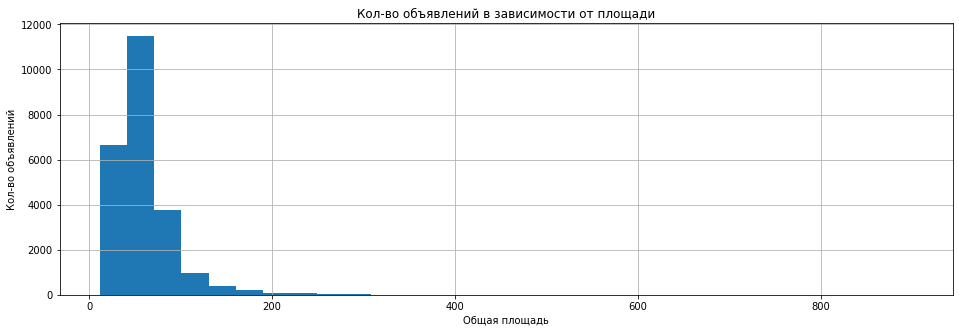

In [52]:
hist_gistogramma('total_area', 'Кол-во объявлений в зависимости от площади', 'Общая площадь')

Предложения видны вплоть до 300 кв.м. 

Для более детального изучения создадим диаграмму размаха.

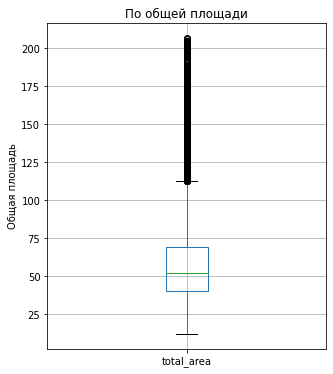

In [53]:
box_plot('total_area', 'По общей площади', 'Общая площадь')

По диаграмме мы видим, что основная часть объявлений приходится на квартиры площадью от 20 до 120 кв.м.

Выведим в близких значениям к этим рамкам гистограмму

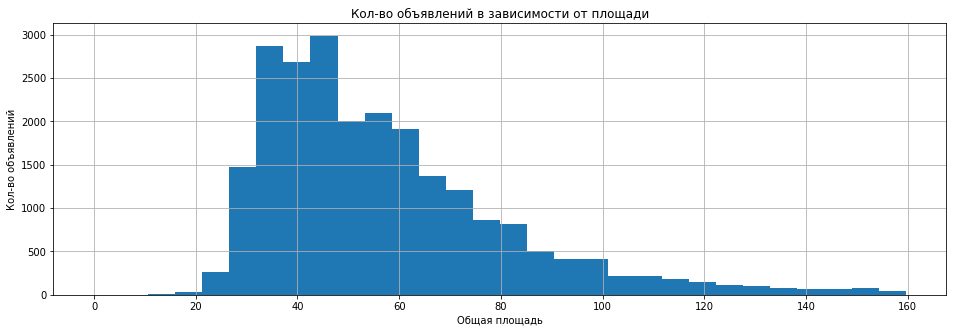

In [54]:
hist_gistogramma('total_area', 'Кол-во объявлений в зависимости от площади', 'Общая площадь', option=1)

#### Вывод

По гистограмме и диаграмме размаха, мы видим что основные значение площади квартиры находятся в диапазоне от 20 до 120 метров, большая же часть из этого диапазона приходится на квартиры от 30 до 75 кв.м. В дальнейшем будем учитывать данные значения.

### Общая стоимость квартиры

Сформируем основную информацию по значениям столбца `last_price`

In [55]:
df['last_price'].describe()

count       23699.00
mean      6541548.77
std      10887013.27
min         12190.00
25%       3400000.00
50%       4650000.00
75%       6800000.00
max     763000000.00
Name: last_price, dtype: float64

Среднее и медианное значения сильно отличаются, в большую сторону по средней. Выделяется от основных значений минимальное.

Выведим гистограмму по столбцу `last_price`

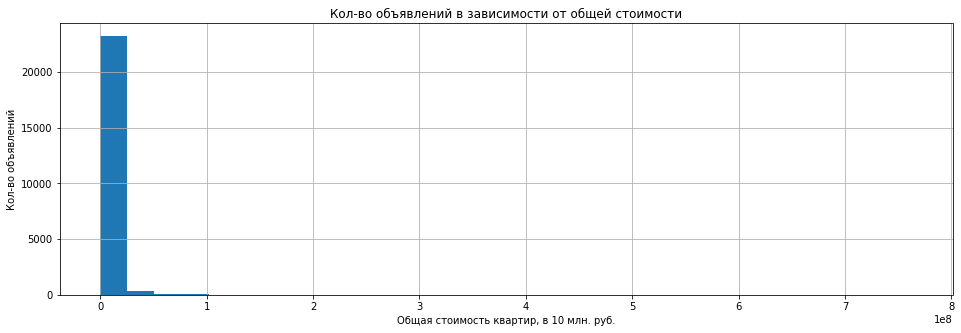

In [56]:
hist_gistogramma('last_price', 'Кол-во объявлений в зависимости от общей стоимости', 'Общая стоимость квартир, в 10 млн. руб.')

Видимые значения проявляются примерно до 15000000 руб.

Для более детального изучения информации выведим гистограмму с ограничением по данному значению.

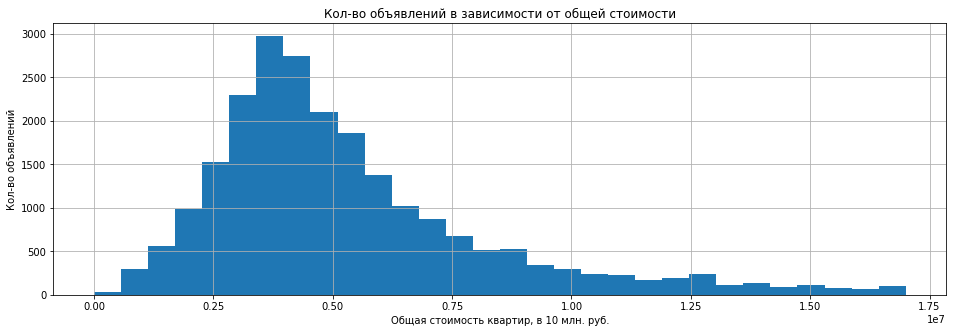

In [57]:
hist_gistogramma('last_price', 'Кол-во объявлений в зависимости от общей стоимости', 'Общая стоимость квартир, в 10 млн. руб.', option=1)

Выведим диаграмму размаха с таким же ограничением.

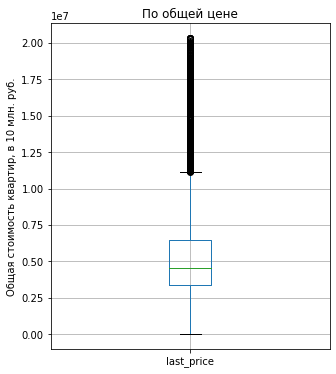

In [58]:
box_plot('last_price', 'По общей цене', 'Общая стоимость квартир, в 10 млн. руб.')

#### Вывод

По гистограмме и диаграмме размаха, мы видим, что основные значение стоимости квартиры находятся в диапазоне до 10,8 млн.руб., все остальные значения являются выбросами.

### Стоимость квадратного метра

Выведим общие значения по столбцу `cost_square_meter`- стоимость кв.м.

In [59]:
df['cost_square_meter'].describe()

count     23699.00
mean      99421.21
std       50306.81
min         111.00
25%       76585.00
50%       95000.00
75%      114256.00
max     1907500.00
Name: cost_square_meter, dtype: float64

Средние и медианные значения достаточно ровные, отличаюся до 5%. Вызывают сомнения минимальное значение в размере 111 руб.

Создадим гистограмму по данному столбцу.

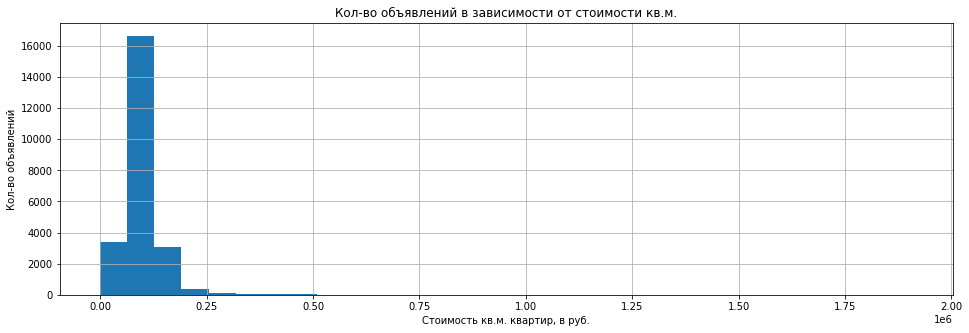

In [60]:
hist_gistogramma('cost_square_meter', 'Кол-во объявлений в зависимости от стоимости кв.м.', 'Cтоимость кв.м. квартир, в руб.')

Данные выскакивают примерно до 500000 руб. Остальные скорее всего, как выбросы.

Для детального изучения, сформируем гистограмму с ограничением в 500000 руб.

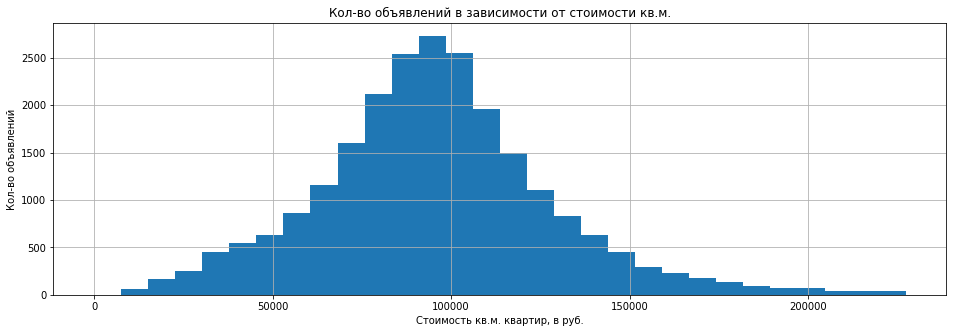

In [61]:
hist_gistogramma('cost_square_meter', 'Кол-во объявлений в зависимости от стоимости кв.м.', 'Cтоимость кв.м. квартир, в руб.', option=1)

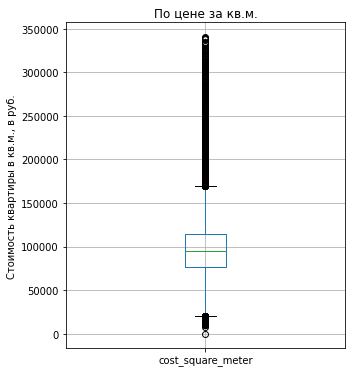

In [62]:
box_plot('cost_square_meter', 'По цене за кв.м.', 'Стоимость квартиры в кв.м., в руб.')

#### Вывод

Можно сказать следующее, значения, что меньше 25000 и больше 170000 рублей, являются для нас выбросами. В дальнейшем будем учитывать это. Медиана находится находится на уровне 95000 руб.

### Число комнат

Выведим основные показатели по столбцу `rooms`

In [63]:
df['rooms'].describe()

count   23699.00
mean        2.07
std         1.08
min         0.00
25%         1.00
50%         2.00
75%         3.00
max        19.00
Name: rooms, dtype: float64

Среднее и медианное значение одинаково.

Выведим гистограмму.

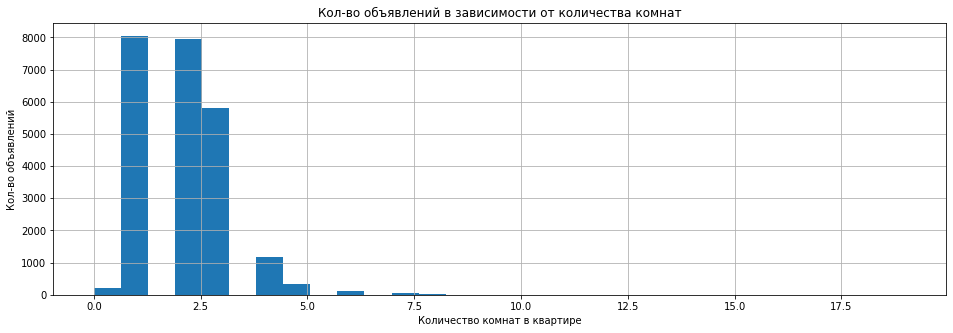

In [64]:
hist_gistogramma('rooms', 'Кол-во объявлений в зависимости от количества комнат', 'Количество комнат в квартире')

Есть предложения квартир с 6 комнатами и более. Вполне возможно, что эти квартиры были созданы/объдинены из бывших коммунальных. Однако предложение из 19 комнат выбивается.

Сформируем гистограмму с ограничением до 9 комнат.

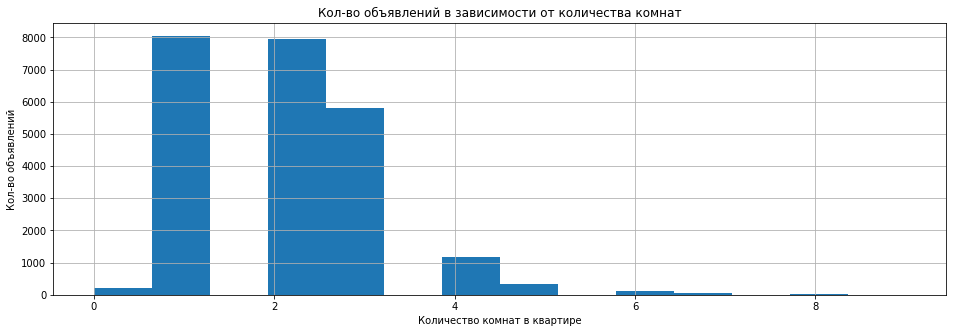

In [65]:
hist_gistogramma('rooms', 'Кол-во объявлений в зависимости от количества комнат', 'Количество комнат в квартире', bin=14, option=1)

Основная часть приходится на квартиры с 1й комнатой и до 5 комнат.

Сформируем диаграмму размаха с ограничением до 10.

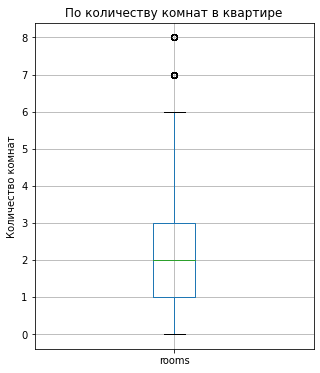

In [66]:
box_plot('rooms', 'По количеству комнат в квартире', 'Количество комнат')

#### Вывод

Значения, что больше 6 комнат, являются для нас выбросами. В дальнейшем будем учитывать это. Медиана и среднее значение находится находится на уровне 2 комнат.

### Высота потолков

Сформируем основные показатели по столбцу `ceiling_height`

In [67]:
df['ceiling_height'].describe()

count   23699.00
mean        2.67
std         1.00
min         1.00
25%         2.50
50%         2.50
75%         2.70
max       100.00
Name: ceiling_height, dtype: float64

Среднее и медианное значение более-менее ровные. Очень выбивается значение предложение с высотой потолка в 100 м.

Сформируем гистограмму по текущему столбцу.

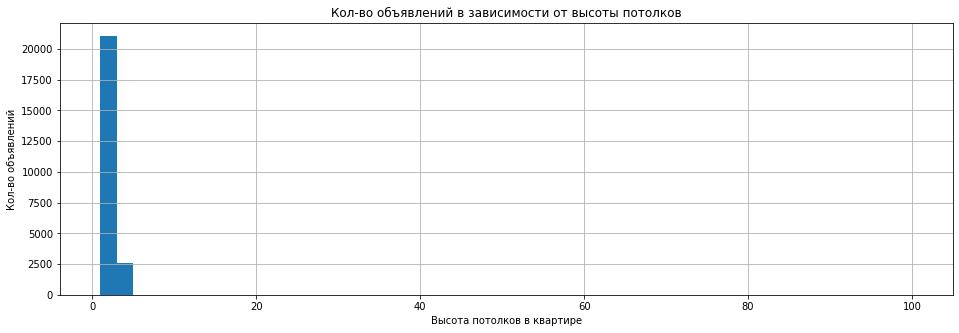

In [68]:
hist_gistogramma('ceiling_height', 'Кол-во объявлений в зависимости от высоты потолков', 'Высота потолков в квартире', bin=50)

Основные предложение предствлены с потолками от 2 до 5 метров.

Сформируем гистограмму с рядом ограничений для более четкого понимания.

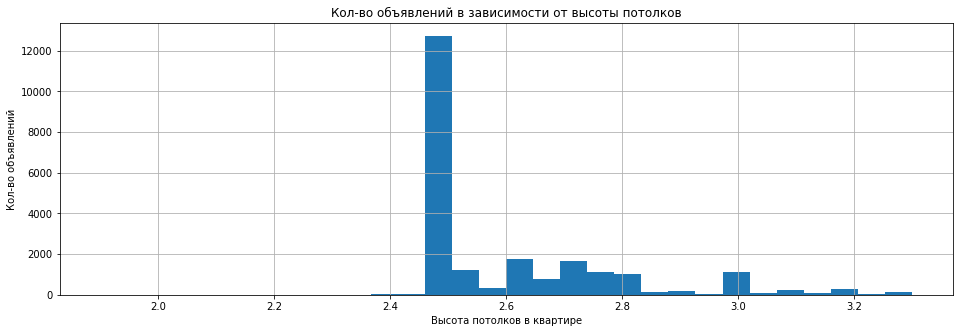

In [69]:
hist_gistogramma('ceiling_height', 'Кол-во объявлений в зависимости от высоты потолков', 'Высота потолков в квартире', option=1, bin=30)

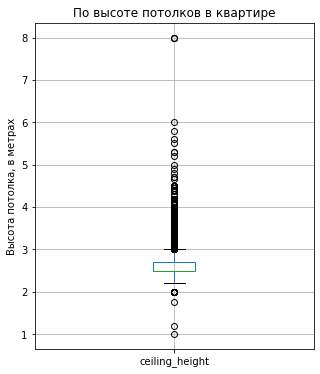

In [70]:
box_plot('ceiling_height', 'По высоте потолков в квартире', 'Высота потолка, в метрах')

#### Вывод

Можно сказать следующее, значения что меньше 2,4 м и больше 2,85 м, являются для нас выбросами. В дальнейшем будем учитывать это. Медиана находится находится на уровне 2,65 м, среднее значение на уровне 2,72 м.

### Кол-во дней выставления объявлений

Выведим основные показатели по кол-ву дней выставления объявления.

In [71]:
df['days_exposition'].describe()

count   20518.00
mean      180.89
std       219.73
min         1.00
25%        45.00
50%        95.00
75%       232.00
max      1580.00
Name: days_exposition, dtype: float64

Среднее и медианное значение очень сильно отличаются 180 и 95 дней соответственно. Выбивается значение в 1580 дней.

Выведим гистограмму по данному столбцу.

<AxesSubplot:ylabel='Frequency'>

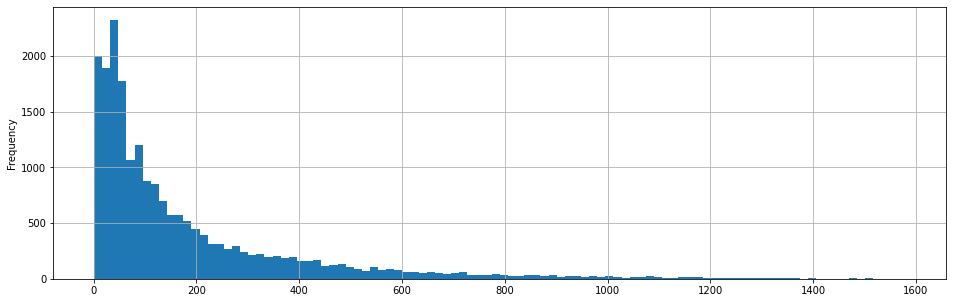

In [72]:
df['days_exposition'].plot(bins=100, figsize=(16, 5), kind='hist', grid=True)

Мы видим, что небольшие возвышения на гистограмме проявлятся вплоть до 800 дней. Свыше уже незначительны.

Исходя из этого сформируем новую гистограмму, для более подробного изучения.

<AxesSubplot:ylabel='Frequency'>

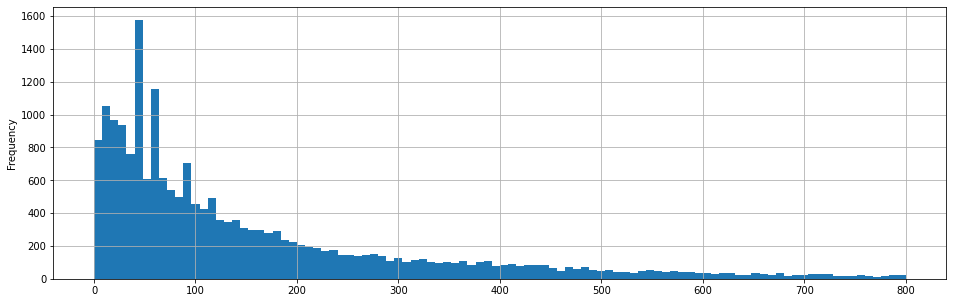

In [73]:
df['days_exposition'].plot(bins=100, figsize=(16, 5), kind='hist', range=(0, 800), grid=True)

Для более полной "картины", выведим диаграмму размаха 

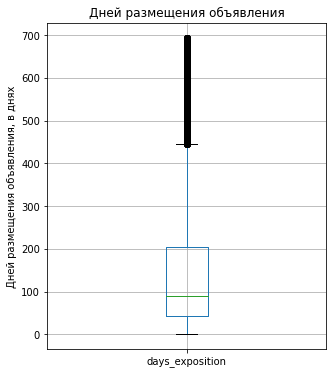

In [74]:
box_plot('days_exposition', 'Дней размещения объявления', 'Дней размещения объявления, в днях')

Выведим основные показатели с ограничением в 500 дней.

In [75]:
df[(df['days_exposition'] <= 500)]['days_exposition'].describe()

count   18769.00
mean      127.15
std       119.26
min         1.00
25%        41.00
50%        84.00
75%       181.00
max       500.00
Name: days_exposition, dtype: float64

#### Вывод

Как видим, среднее и медианное значение составляет уже 127 и 84 дней соотвественно.

По гистограмме мы видим, что основное время продажи распределяется в основном до 500 дней, далее уже относительно редкие значения, выбросы. Пик продаж приходится примерно до 45-60 дней.

Вышли также более четкие значения пиков, самый большое значение на 45 днях, следующее на 60 днях размещения рекламного объявления.

Также стоит отметить, что "прострелы" возникают на недельном(7-10), 30, 45, 60 и 90 днях. Вполне возможно, что это определенные ограничения, либо этапы размещения объявления на площадке, после которого нужно выставлять новый определенный или неопределенный срок.

Можно считать, что если квартира продалась до 7 дней, то это очень быстро, если более 210 дней это уже долго. Нормальным можно считать срок до 210 дней.

В дальнейшем будем учитывать данные выводы.

## Зависимости

В этом разделе, мы будем искать зависимость стоимости квадратного метра от других параметров. Это будет правильнее, чем если бы мы искали зависимость на общую стоимость квартиры.

На основании предыдущего исследования, сформируем dataframe под названием `df_cost`, в котором исключим выбросы по стоимости квадратного метра.

In [76]:
df_cost = df[(df['cost_square_meter'] <= df['cost_square_meter'].quantile(0.75) + 1.5*(df['cost_square_meter'].quantile(0.75) - df['cost_square_meter'].quantile(0.50))) & (df['cost_square_meter'] >= df['cost_square_meter'].quantile(0.25) - 1.5*(df['cost_square_meter'].quantile(0.50) - df['cost_square_meter'].quantile(0.25)) if (df['cost_square_meter'].quantile(0.25) - 1.5*(df['cost_square_meter'].quantile(0.50) - df['cost_square_meter'].quantile(0.25))) > 0 else 0)].copy()

Проверим сколько 'ушло' выбросов в датафрейме `df_cost`:

In [77]:
df_cost['first_day_exposition'].count()

19891

Результат хороший, чуть больше 10%

Проверим сколько 'ушло' выбросов в датафрейме `df_cost_total`:

In [78]:
df_cost_total = df[(df['last_price'] <= df['last_price'].quantile(0.75) + 1.5*(df['last_price'].quantile(0.75) - df['last_price'].quantile(0.50))) & (df['last_price'] >= df['last_price'].quantile(0.25) - 1.5*(df['last_price'].quantile(0.50) - df['last_price'].quantile(0.25)) if (df['last_price'].quantile(0.25) - 1.5*(df['last_price'].quantile(0.50) - df['last_price'].quantile(0.25))) > 0 else 0)].copy()

Результат также нас устраивает, примерно 10% выбыло

Создадим функцию с помощью которой будем выводить на экран сгруппированные данные и создавать гистограммы по ним.

In [79]:
def corr_hist_plot(column, title, xlabel, param=0):
    """Функция выводит сгруппированные данные по определенному столбцу данных и выводит соответствующую гистограмму"""
    
    if param == 0:
        print('Выведим таблицу с сгруппированными данными:')
        ax1 = df_cost.groupby(column, as_index=False)['cost_square_meter'].mean().sort_values('cost_square_meter', ascending=True);
        print(ax1)
        print()
        print('Далее выведим гистрограмму')
        ax = df_cost.groupby(column, as_index=False)['cost_square_meter'].mean().sort_values(column, ascending=False).plot.bar(x=column, y='cost_square_meter', grid=True, figsize=(16, 6));
        ax.set_title(title);
        ax.set_xlabel(xlabel);
        ax.set_ylabel('Стоимость кв. м., руб.');
    elif param == 1:
        print('Выведим таблицу с сгруппированными данными:')
        ax1 = df_cost.groupby(column, as_index=False)['last_price'].mean().sort_values('last_price', ascending=True);
        print(ax1)
        print()
        print('Далее выведим гистрограмму')
        ax = df_cost.groupby(column, as_index=False)['last_price'].mean().sort_values(column, ascending=False).plot.bar(x=column, y='last_price', grid=True, figsize=(16, 6));
        ax.set_title(title);
        ax.set_xlabel(xlabel);
        ax.set_ylabel('Стоимость квартиры, в 10х млн.руб.');
    

### Зависимость цены от площади

Применим метод corr() для рассчета корреляции.

In [80]:
df_cost['cost_square_meter'].corr(df_cost['total_area']) #воспользуемся методом corr()

0.011352699168023034

Корреляция по общим данным, показывает практически нулевое значение.

Далее проведем группировку по площади. Для этого создадим в dataframe `df_cost` столбец `total_area_round` в котором пропишем округленные значения с учетом выбросов. Изначально при исследовании, мы определили, что границы за которыми находятся выбросы находятся в пределах 20 - 120 метров.

In [81]:
df_cost['total_area_round'] = round(df_cost[(df_cost['total_area'] >= 20) & (df_cost['total_area'] <= 120)]['total_area'])

In [82]:
df_cost_total['total_area_round'] = round(df_cost_total[(df_cost_total['total_area'] >= 20) & (df_cost_total['total_area'] <= 120)]['total_area'])

Сгруппируем данные и посмотрим корреляцию на средних значениях.

Выведим таблицу с сгруппированными данными:
    total_area_round  cost_square_meter
54             74.00           86655.59
62             82.00           88498.79
91            111.00           88594.80
41             61.00           89162.39
42             62.00           89255.28
..               ...                ...
83            103.00          108991.35
5              25.00          109587.50
98            118.00          109688.90
86            106.00          112300.46
89            109.00          113280.79

[101 rows x 2 columns]

Далее выведим гистрограмму


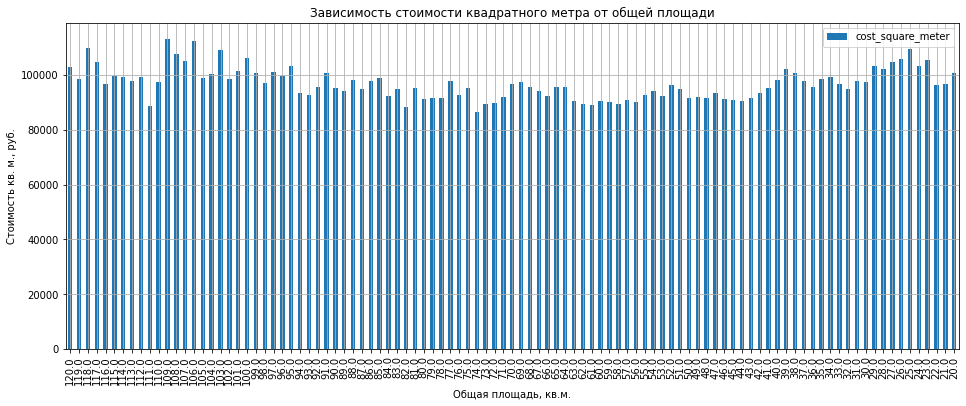

In [83]:
corr_hist_plot('total_area_round', 'Зависимость стоимости квадратного метра от общей площади', 'Общая площадь, кв.м.')

По таблице видно, что есть значительная корреляция на определенных значениях.

Выведим таблицу с сгруппированными данными:
     total_area_round  last_price
0               20.00  2031500.00
1               21.00  2036250.00
2               22.00  2122973.79
3               23.00  2433280.00
4               24.00  2478136.26
..                ...         ...
86             106.00 11914376.92
97             117.00 12241680.73
100            120.00 12333972.22
89             109.00 12342500.00
98             118.00 12949647.62

[101 rows x 2 columns]

Далее выведим гистрограмму


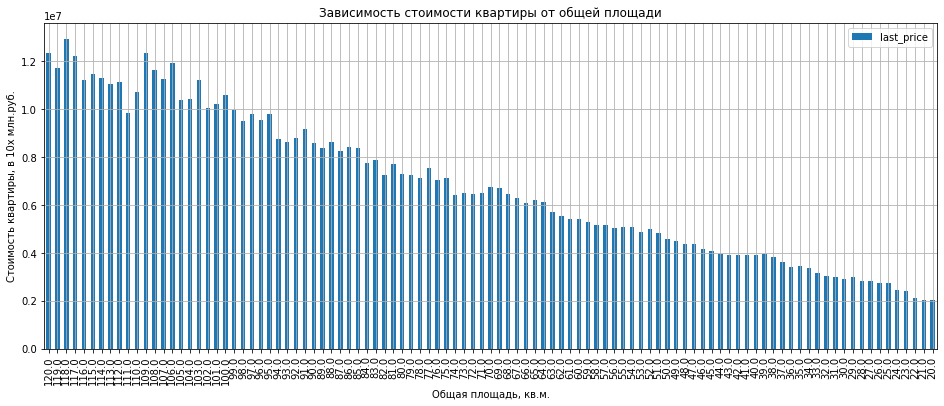

In [84]:
corr_hist_plot('total_area_round', 'Зависимость стоимости квартиры от общей площади', 'Общая площадь, кв.м.', param=1)

#### Вывод

Коэффициент корреляции показывает практически нулевую корреляцию на общих данных без группировки, однако если посмотреть на диаграмму то можно заметить, что есть слабая отрицательная корреляция. По площади от 30 кв.м. и до 65 кв.м. Т.е. при увеличении метража квартиры на указанном нами промежутке стоимость кв.м. в большинстве случаев снижается.

По сгруппированным данным, "картина" другая. Видно, что значения от 28 до 85 кв.м. несколько ниже, чем до и после, в некоторых значениях есть "отрыв" в 50%

### Зависимость цены от количества комнат

Сгрупируем данные по количеству комнат и выведим показатели.

Выведим таблицу с сгруппированными данными:
    rooms  cost_square_meter
15     19           86091.00
9       9           88602.14
8       8           89054.38
3       3           90675.34
4       4           91787.03
5       5           92513.76
12     14           92827.00
2       2           93749.61
6       6           94105.23
11     11           95264.00
10     10           98009.67
1       1           98772.48
7       7           99569.59
0       0          104048.77
14     16          105555.00
13     15          110169.00

Далее выведим гистрограмму


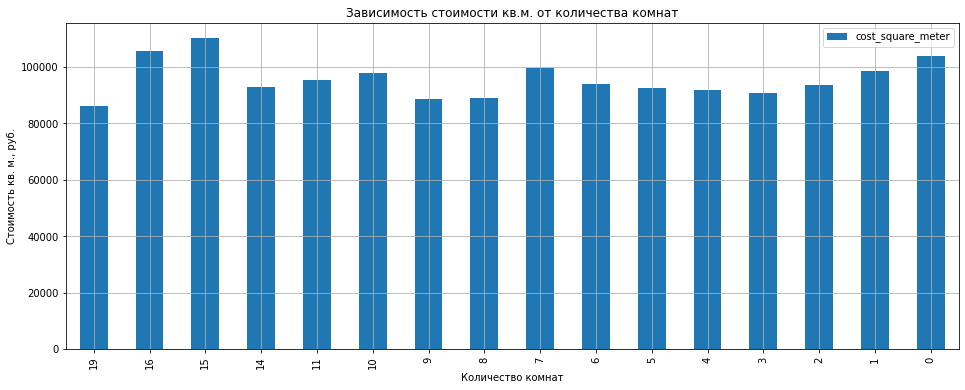

In [85]:
corr_hist_plot('rooms', 'Зависимость стоимости кв.м. от количества комнат', 'Количество комнат')

По сгруппированным данным видна корреляция. В ряде данных разрыв до 27%.

Сформируем гистограмму по сгруппированным данным, отсортируем по количеству комнат.

Выведим таблицу с сгруппированными данными:
    rooms  last_price
0       0  2841033.52
1       1  3696081.68
2       2  5219383.65
3       3  6947339.05
4       4  9578081.80
5       5 13699395.48
11     11 17500000.00
6       6 17749470.27
8       8 21173750.00
7       7 23566684.78
10     10 26166666.67
9       9 26459842.86
12     14 26829500.00
14     16 28500000.00
15     19 32250000.00
13     15 65000000.00

Далее выведим гистрограмму


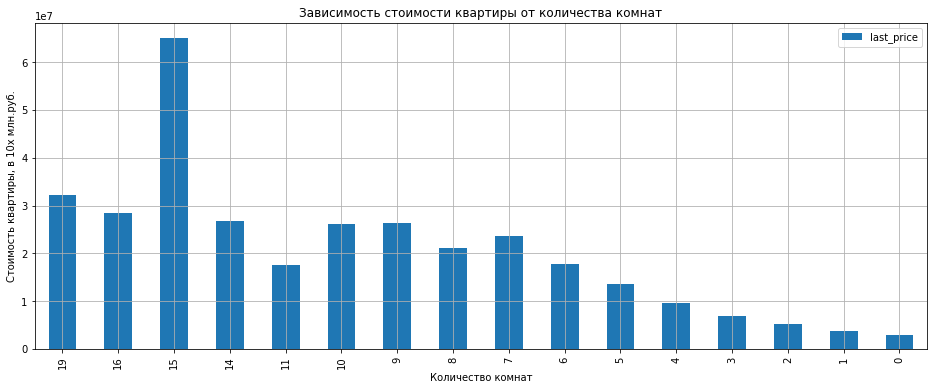

In [86]:
corr_hist_plot('rooms', 'Зависимость стоимости квартиры от количества комнат', 'Количество комнат', param=1)

#### Вывод

По сгруппированным данным по средней цене за кв.м. видно, что стоимость проседает по мере увеличения комнат от комнаты студии и до 3х комнатной снижается, далее идет повышение стоимости кв.м. Можно считать, что стоимость кв.м. студий самая высокая, при условии, что мы не учитываем выбросы.

### Зависимость цены от удаленности от центра

Применим метод corr() корреляции данных по стоимости за кв.м. жилья и сразу же по общей стоимости квартиры.

In [87]:
df_cost['city_centers_nearest'].corr(df_cost['cost_square_meter']) #используем метод corr()

-0.380741285146361

In [88]:
df_cost_total['city_centers_nearest'].corr(df_cost_total['last_price']) #используем метод corr()

-0.3325482800966344

Стоит заметить, что корреляция по стоимости за кв.м. заметнее, чем по общей стоимости квартиры.

Проверим корреляцию по сгруппированным данным на средних значениях стоимости кв.м. и по общей стоимости.

Для этого создадим колонку `city_centers_nearest_round` в dataframe `df_cost` в которой разместим данные в км от центра

In [89]:
df_cost['city_centers_nearest_round'] = round(df_cost['city_centers_nearest'] / 1000)

Аналогично сделаем с датафреймом `df_cost_total`

In [90]:
df_cost_total['city_centers_nearest_round'] = round(df_cost_total['city_centers_nearest'] / 1000)

Выведим сгруппированные по удаленности от центра данные

Выведим таблицу с сгруппированными данными:
    city_centers_nearest_round  cost_square_meter
56                       61.00           60606.00
41                       42.00           62479.00
58                       63.00           62500.00
55                       60.00           65221.50
57                       62.00           69114.00
..                         ...                ...
6                         6.00          109483.78
7                         7.00          109666.29
1                         1.00          109827.79
8                         8.00          111404.18
54                       59.00          132812.00

[61 rows x 2 columns]

Далее выведим гистрограмму


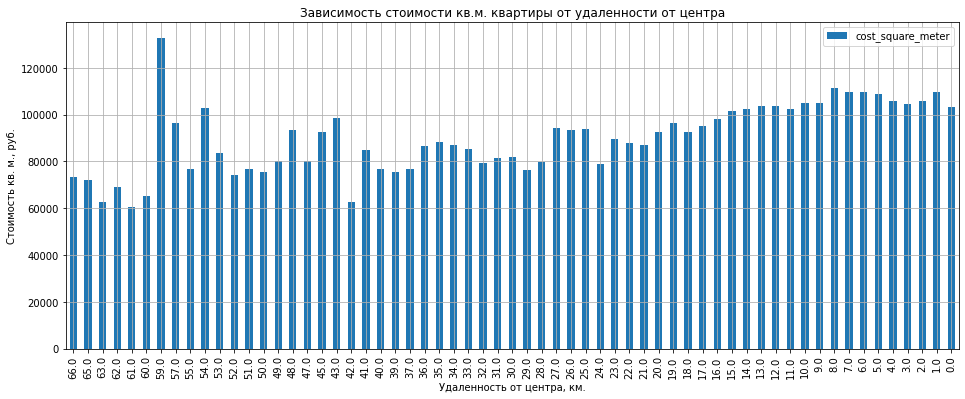

In [91]:
corr_hist_plot('city_centers_nearest_round', 'Зависимость стоимости кв.м. квартиры от удаленности от центра', 'Удаленность от центра, км.')

Данные значительно отличаются друг от друга, в ряде случаем более чем в 2 раза.

Посмотрим это на гистограмме.

Выведим таблицу с сгруппированными данными:
    city_centers_nearest_round  last_price
55                       60.00  2050000.00
53                       57.00  3015000.00
41                       42.00  3058333.33
38                       39.00  3100000.00
57                       62.00  3200000.00
..                         ...         ...
4                         4.00  9319675.20
5                         5.00  9830808.54
2                         2.00 10126586.54
1                         1.00 10586386.55
0                         0.00 10780000.00

[61 rows x 2 columns]

Далее выведим гистрограмму


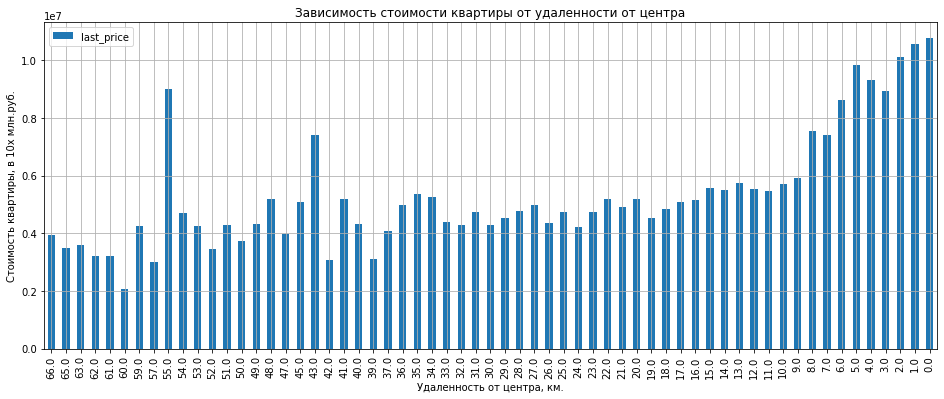

In [92]:
corr_hist_plot('city_centers_nearest_round', 'Зависимость стоимости квартиры от удаленности от центра', 'Удаленность от центра, км.', param=1)

#### Вывод

Исходя из диаграммы и метода корреляции по не сгруппированным данным, мы видем слабую отрицательную корреляцию. Т.е. при увеличении растояния до центра снижается стоимость кв.м. квартиры.

При исследовании сгруппированных данных, мы видим уже явно выраженную отрицательную корреляцию, кроме значений до 8 км от центра, а именно снижение стоимости кв.м. при удаленности от центра. Также явно проглядываются "взрывы" на 54 и 59 км.

### Зависимость цены от этажности

Применим метод корреляции данных corr() корреляции данных по стоимости за кв.м. жилья и сразу же по общей стоимости квартиры в зависимости от этажности.

In [93]:
df_cost['floor'].corr(df_cost['cost_square_meter'])

0.19154068412501654

In [94]:
df_cost['floor'].corr(df_cost['cost_square_meter'])

0.19154068412501654

Исходя из этого показателия прослеживается слабая положительная корреляция.

Сгруппируем данные по этажам.

Выведим таблицу с сгруппированными данными:
    floor  cost_square_meter
0       1           86423.91
4       5           91923.62
26     27           92476.20
1       2           92607.75
2       3           93240.05
3       4           93578.52
25     26           93728.04
8       9           96201.71
6       7           97682.80
5       6           97696.65
7       8           97788.64
31     32           98019.00
32     33           98019.00
17     18          100402.95
13     14          101061.21
9      10          101123.39
10     11          101389.83
11     12          101487.51
14     15          101928.29
18     19          102737.80
24     25          103224.63
20     21          103254.58
16     17          103465.06
12     13          103604.23
15     16          103644.71
22     23          103873.67
23     24          104130.59
19     20          104321.83
21     22          104451.99
30     31          105555.00
27     28          110925.00
28     29          122666.00

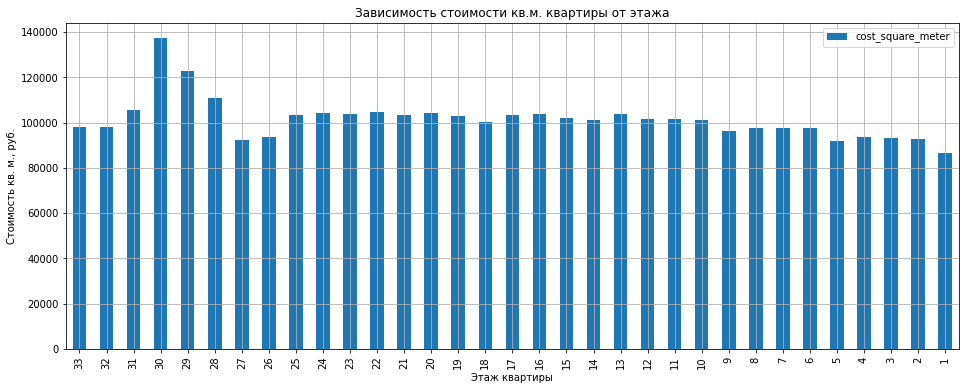

In [95]:
corr_hist_plot('floor', 'Зависимость стоимости кв.м. квартиры от этажа', 'Этаж квартиры')

Можно наблюдать значительную разницу на отдельных значениях, в ряде случаев отличие на 60%.

Сформируем гистограмму по сгруппированным значениям:

Выведим таблицу с сгруппированными данными:
    city_centers_nearest_round  last_price
55                       60.00  2050000.00
53                       57.00  3015000.00
41                       42.00  3058333.33
38                       39.00  3100000.00
57                       62.00  3200000.00
..                         ...         ...
4                         4.00  9319675.20
5                         5.00  9830808.54
2                         2.00 10126586.54
1                         1.00 10586386.55
0                         0.00 10780000.00

[61 rows x 2 columns]

Далее выведим гистрограмму


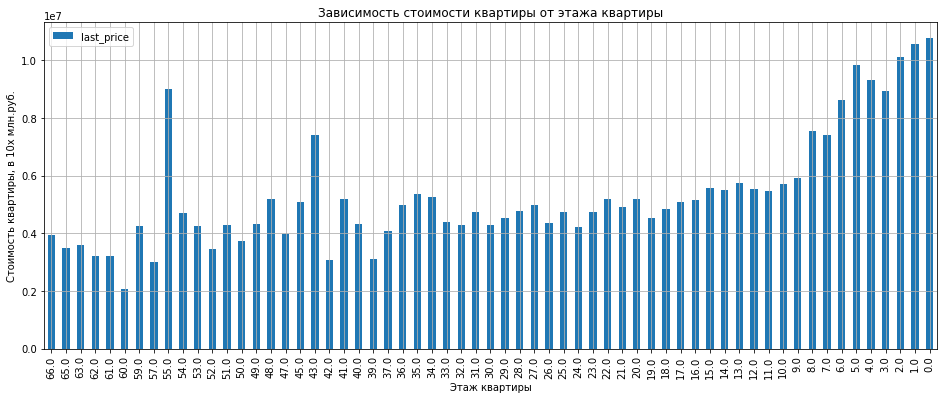

In [96]:
corr_hist_plot('city_centers_nearest_round', 'Зависимость стоимости квартиры от этажа квартиры', 'Этаж квартиры', param=1)

Стоит отметить, значительный рост стоимости квартиры до 9 этажа и отдельно 43 и 55.

Посмотрим зависимость цены от типов этажа, на основе ранее категоризированных данных по столбцу `floor_categ`

Выведим таблицу с сгруппированными данными:
  floor_categ  cost_square_meter
1      Первый           86423.91
2   Последний           90467.90
0      Другой           96868.43

Далее выведим гистрограмму


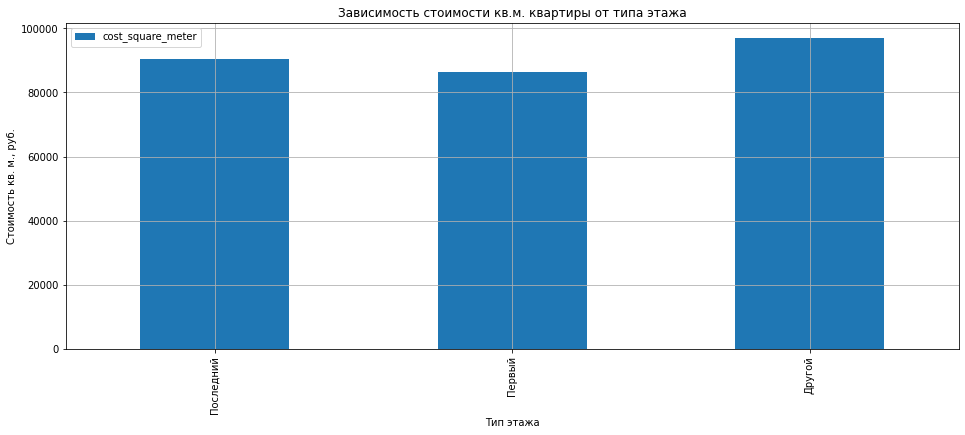

In [97]:
corr_hist_plot('floor_categ', 'Зависимость стоимости кв.м. квартиры от типа этажа', 'Тип этажа')

Сформируем для наглядности гистограмму по данным типам.

Выведим таблицу с сгруппированными данными:
  floor_categ  last_price
1      Первый  4843879.50
0      Другой  5569156.39
2   Последний  5582259.23

Далее выведим гистрограмму


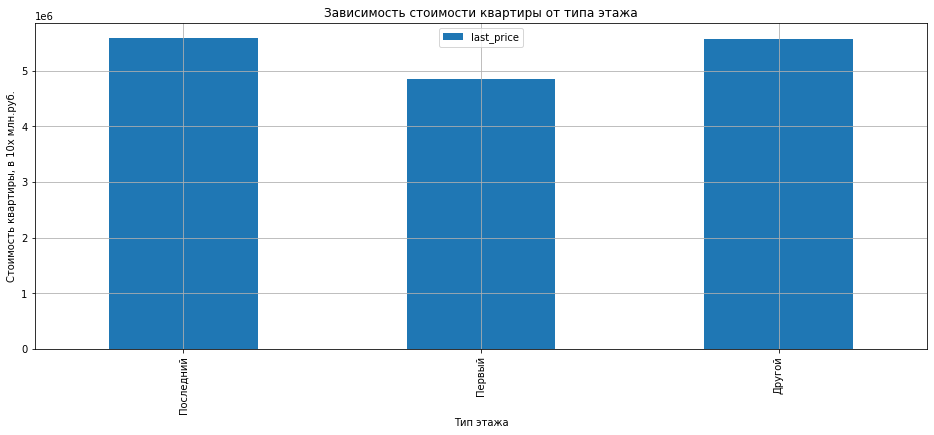

In [98]:
corr_hist_plot('floor_categ', 'Зависимость стоимости квартиры от типа этажа', 'Тип этажа', param=1)

#### Вывод

На основе сгруппированных данных в ряде случаев есть значительная разница в стоимости кв.м. в зависимости от этажа размещения квартиры. Однако постоенная гистограмма показывает слабую положительную корреляцию, т.е. стоимость немного увеличивается в зависимости от повышения этажа квартиры.

Как видим, при выводе сгруппированных данных подобная ситуация, первый этаж проседает по цене по сравнению с другими группами, последний этаж по-середине, другие этаже по стоимости выше.

### Зависимость цены от дня недели размещения объявления

Сгруппируем данные по дням недели

Выведим таблицу с сгруппированными данными:
  day_exposition  cost_square_meter
0    Воскресенье           94319.98
2    Понедельник           94355.23
5        Суббота           94478.31
4          Среда           94655.98
3        Пятница           94712.72
6        Четверг           95209.31
1        Вторник           95334.52

Далее выведим гистрограмму


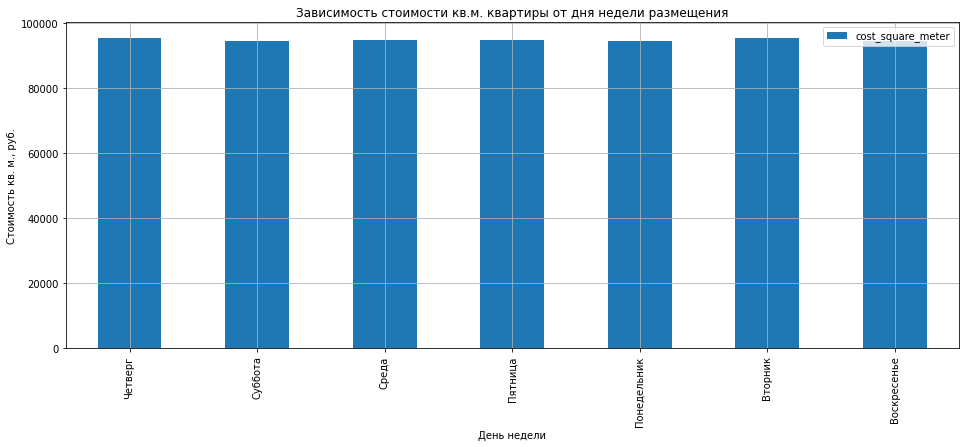

In [99]:
corr_hist_plot('day_exposition', 'Зависимость стоимости кв.м. квартиры от дня недели размещения', 'День недели')

В целом все данные ровные. Отличие в крайних значениях в чуть более 1%.

Выведим таблицу с сгруппированными данными:
  day_exposition  last_price
5        Суббота  5356701.80
2    Понедельник  5368808.59
3        Пятница  5379890.72
0    Воскресенье  5400025.41
1        Вторник  5532709.06
4          Среда  5533750.08
6        Четверг  5679595.65

Далее выведим гистрограмму


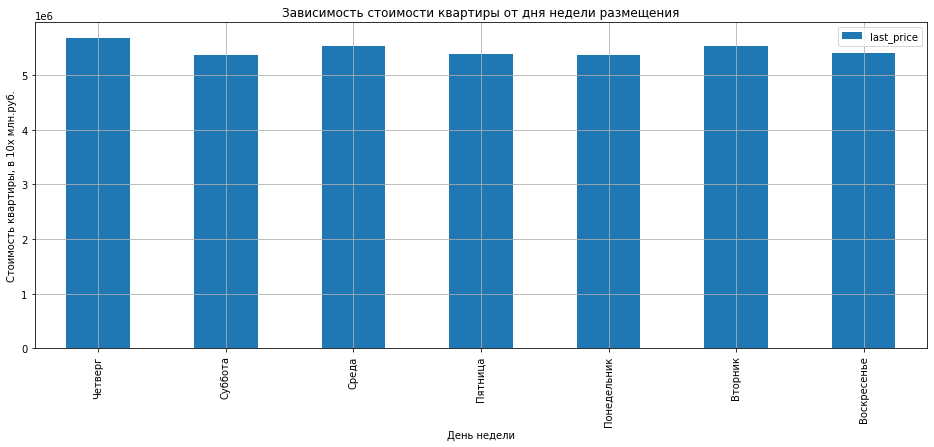

In [100]:
corr_hist_plot('day_exposition', 'Зависимость стоимости квартиры от дня недели размещения', 'День недели', param=1)

#### Вывод

В целом группировка и гистограмма на основе ее показывает, что корреляци по признаку дня размещения объявления отсутствует.

### Зависимость цены от месяца размещения объявления

Сгруппируем данные на основе месяца размещения объявления.

Выведим таблицу с сгруппированными данными:
   month_exposition  cost_square_meter
5               Май           93569.60
4              Июнь           93635.96
2           Декабрь           94458.83
8           Октябрь           94505.74
10          Февраль           94506.65
11           Январь           94580.66
7            Ноябрь           94642.92
9          Сентябрь           95063.82
6              Март           95333.30
3              Июль           95385.67
1            Апрель           95463.41
0            Август           95862.97

Далее выведим гистрограмму


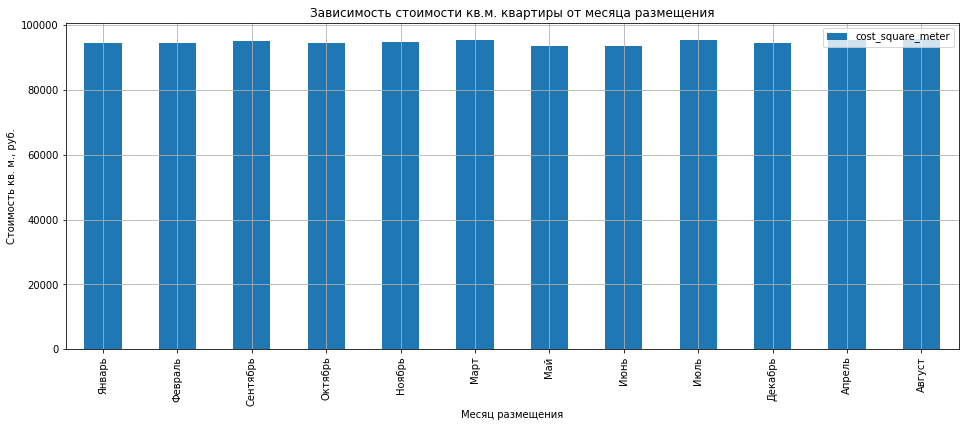

In [101]:
corr_hist_plot('month_exposition', 'Зависимость стоимости кв.м. квартиры от месяца размещения', 'Месяц размещения')

Выведим таблицу с сгруппированными данными:
   month_exposition  last_price
4              Июнь  5318181.99
0            Август  5387117.27
11           Январь  5433325.68
5               Май  5436510.42
8           Октябрь  5444403.35
6              Март  5474728.79
7            Ноябрь  5479826.49
10          Февраль  5502198.43
1            Апрель  5526167.85
2           Декабрь  5565793.33
9          Сентябрь  5586705.81
3              Июль  5634311.06

Далее выведим гистрограмму


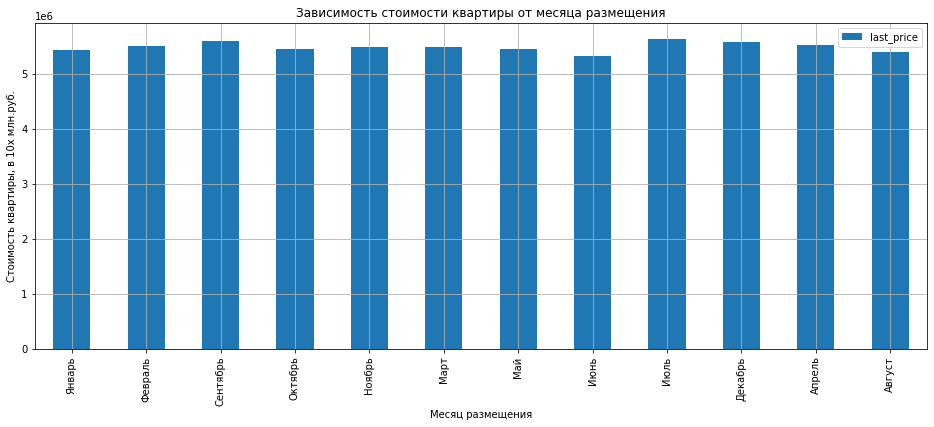

In [102]:
corr_hist_plot('month_exposition', 'Зависимость стоимости квартиры от месяца размещения', 'Месяц размещения', param=1)

#### Вывод

Группировка и гистограмма на основе нее показывают, что есть слабые различия в ряде месяцев, например, значения июня от августа почти на 4%. Но в целом все ровно.

### Зависимость цены от года размещения объявления

Сгруппируем данные на основе года размещения объявления.

Выведим таблицу с сгруппированными данными:
   year_exposition  cost_square_meter
2             2016           92420.58
3             2017           92663.17
1             2015           93239.47
4             2018           95915.36
5             2019          100765.40
0             2014          100867.56

Далее выведим гистрограмму


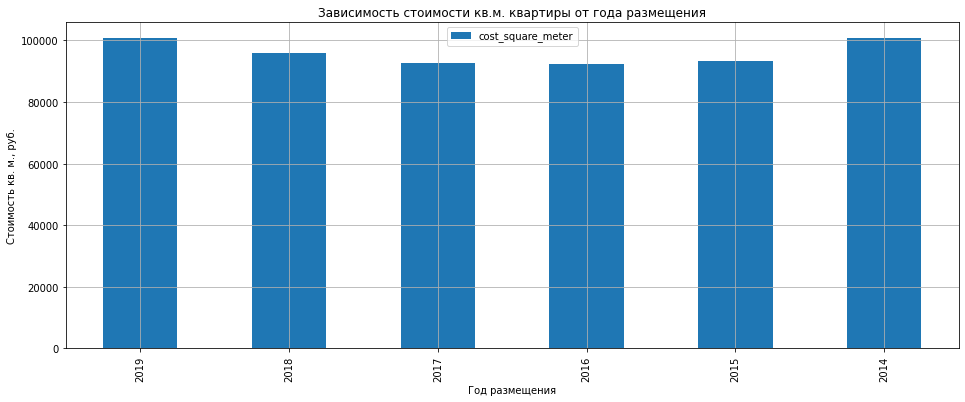

In [103]:
corr_hist_plot('year_exposition', 'Зависимость стоимости кв.м. квартиры от года размещения', 'Год размещения')

Выведим таблицу с сгруппированными данными:
   year_exposition  last_price
4             2018  5348488.79
3             2017  5398375.18
2             2016  5511125.65
5             2019  5699904.82
1             2015  6266119.71
0             2014  8033077.19

Далее выведим гистрограмму


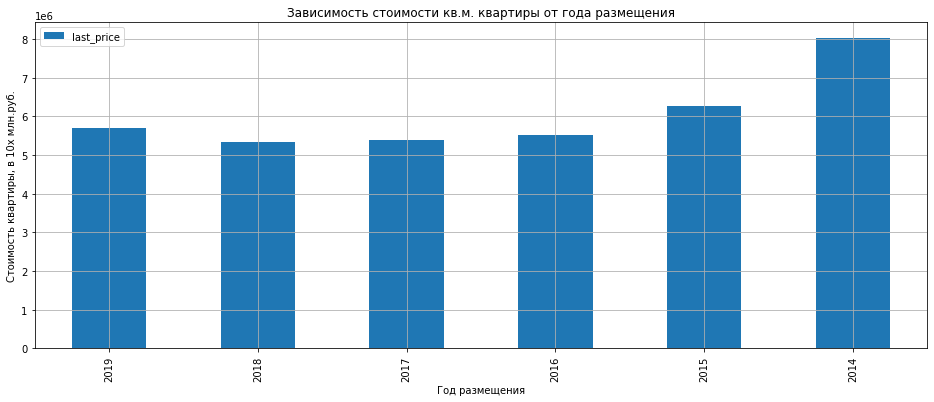

In [104]:
corr_hist_plot('year_exposition', 'Зависимость стоимости кв.м. квартиры от года размещения', 'Год размещения', param=1)

#### Вывод

Группировка и гистограмма на основе нее, показала, что есть проседания в 2016 и 2017. В 2019году стоимость приблизилась к 2014 году.

### Объединенная heatmap карта корреляций данных

Построим `heatmap` карту корреляций по общим данным. Для этого выделим в отдельный датафрейм `df_cost_heat` интересующие нас данные, и выведим на экран.

In [105]:
df_cost_heat = df_cost[['cost_square_meter', 'last_price', 'rooms', 'year_exposition', 'ceiling_height', 'floor', 'total_area_round', 'city_centers_nearest_round']].copy().fillna(0)

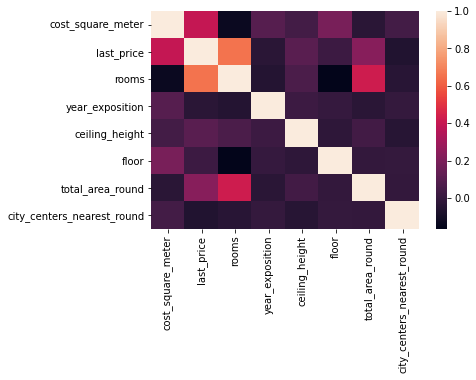

In [106]:
sns.heatmap(df_cost_heat.corr());

#### Вывод

По карте heatmap мы видим, что наши выводы были верными. Явно выделяюется корреляция в комбинациях, общая стоимость и стоимость кв.м., количества комная к общей стоимости и стоимости кв.м., общей площади к общей стоимости и стоимости кв.м. и ряд других.

## Зависимость цены квадратного метра от населенного пункта

Сгруппируем данные по населенному пункту и выделим первые 10 населенных пунктов.

Созадим список из 10 населенных пунктов, где больше всего объявлений. Сохраним все в переменной `df_list_top`

In [107]:
df_list_top = list(df_cost['locality_name'].value_counts().head(10).index)

Вычислим средние значения стоимости кв.м. по всем населенным пунктам, сохраним в переменной `df_cost_local`:

In [108]:
df_cost_local = df_cost.groupby('locality_name', as_index=False)['cost_square_meter'].mean().sort_values('cost_square_meter', ascending=False)

Создадим новый датафрейм на основе списка из 10 отобранных населенных пунктов.

In [109]:
df_top_local_cost = pd.DataFrame(df_list_top, columns=['locality_name'])

Объединим датафрейм `df_top_local_cost` с `df_cost_local` чтобы получить нужные нам значения.

In [110]:
df_top_local_cost_merge = pd.merge(df_top_local_cost, df_cost_local).sort_values('cost_square_meter', ascending=False)

In [111]:
df_top_local_cost_merge

,locality_name,cost_square_meter
0,Санкт-Петербург,102543.00
4,Пушкин,99498.20
7,деревня Кудрово,92473.09
6,посёлок Парголово,90590.22
1,посёлок Мурино,85751.73
9,Петергоф,83719.63
2,посёлок Шушары,78730.21
5,Колпино,75505.66
8,Гатчина,69845.16
3,Всеволожск,68464.04


Выведим полученные результаты на гистограмме.

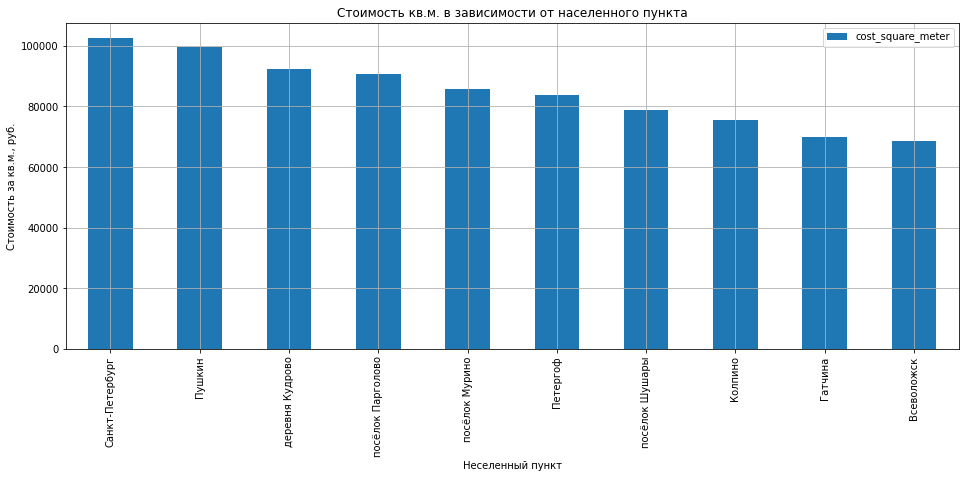

In [112]:
ax = df_top_local_cost_merge.plot(x='locality_name', y='cost_square_meter', kind='bar', grid=True, figsize=(16, 6));
ax.set_title('Стоимость кв.м. в зависимости от населенного пункта');
ax.set_xlabel('Неселенный пункт');
ax.set_ylabel('Стоимость за кв.м., руб.');

#### Вывод

Мы успешно выделили населенные пункты где больше всего объявлений, вывели среднее значение стоимости кв.м. в этих населенных пунктах, отсортировали значения. Самые дорогая стоимость кв.м. в Санкт-Петербурге и Пушкине, самая дешевая стоимость в Выборге и Всеволожске.

## Квартиры Санкт-Петербурга

Создадим dataframe `df_spb` в котором будут отобранны только объявления по Санкт-Петербургу.

In [113]:
df_spb = df[df['locality_name'] == 'Санкт-Петербург'].copy()

Т.к. изначально мы оставляли в столбце `city_centers_nearest` пропущенные значения, проверим останутся ли они при фильтрации по Санкт-Петербургу и сколько их будет.

In [114]:
df_spb['city_centers_nearest'].isna().sum()

69

Да, действительно есть пропущенные значения. Получилось очень малое количество, поэтому мы можем к ним применить замену на медианное значение. Сделаем мы это одновременно с созданием нового столбца `city_centers_nearest_round` в котором создадим категории по отдаленности от цетра через 1 км.

In [115]:
df_spb['city_centers_nearest_round'] = (df_spb['city_centers_nearest'].fillna(df_spb['city_centers_nearest'].median()) / 1000).apply(np.ceil).astype(int)

Сформируем гистограмму в которой выведим кол-во объявлений по каждому километру.

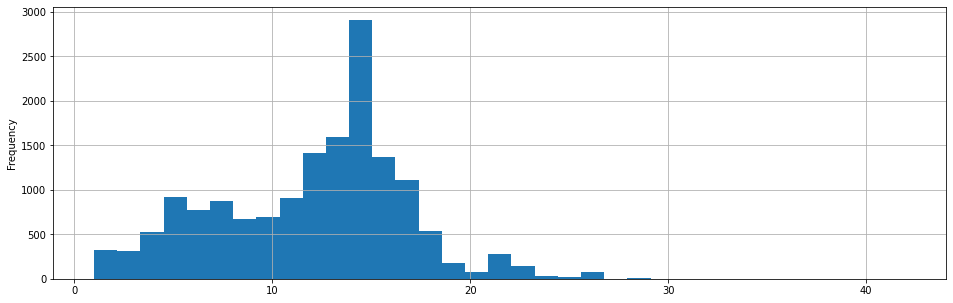

In [116]:
df_spb['city_centers_nearest_round'].plot(bins=35, figsize=(16, 5), kind='hist', grid=True);

По гистограмме очевидно, что пик объявлений приходится на 14-15й километр

Выведим среднюю стоимость кв.м. по каждому километру удаленного от центра. Сохраним в `df_spb_group`

In [117]:
df_spb_group = df_spb.groupby('city_centers_nearest_round')['cost_square_meter'].mean()

In [118]:
df_spb_group

city_centers_nearest_round
1    187323.67
2    166441.74
3    146662.42
4    129369.69
5    137147.83
6    146873.97
7    152277.46
8    141399.29
9    120377.78
10   110048.06
11   111616.45
12   106790.44
13   109949.54
14   107155.28
15   104991.88
16   101882.68
17   100106.15
18    93938.02
19    94831.53
20    95433.95
21   107045.77
22    91492.22
23    88714.24
24    91319.42
25    82439.91
26    91135.60
27    75171.33
28   132115.00
29    81840.20
30    62481.67
32    64029.50
42    96029.00
Name: cost_square_meter, dtype: float64

Посмотрим корреляцию зависимости стоимости кв.м. кватрир по СПБ от удаленности.

In [119]:
df_spb['city_centers_nearest_round'].corr(df_spb['cost_square_meter'])

-0.3100704203151521

Мы видим, что есть средняя отрицательная корреляция. Т.е. при удалении от цетра СПБ стоимость кв.м. понемногу снижается.

Составим график в котором покажем, как меняется средняя стоимость кв.м. в зависимости от удаленности от центра.

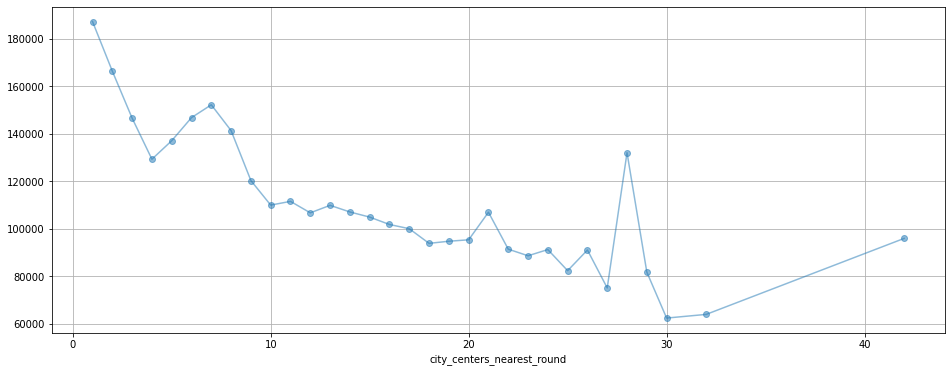

In [120]:
df_spb_group.plot(grid=True, figsize=(16, 6), alpha=0.5, style='o-');

Мы видим, что выделяются стоимости кв.м. до 9 километра. В этой зоне стоимость выше 120000руб. за кв.м.

Это мы и будем считать за центр города.

#### Вывод

Видно, есть средняя отрицательная корреляция в зависимсти от удаленности от центра.

В ходе исследования, мы успешно определили зону центра города.

### Центр Санкт-Петербурга

Для того, чтобы работать с данными из центра СПБ, создадим dataframe `df_spb_center` в котором будут отобранны только объявления по Санкт-Петербургу и все объявления до 8 км включительно. За основу возьмем dataframe `df_spb`

In [121]:
df_spb_center = df_spb[df_spb['city_centers_nearest_round'] <= 8]

Создадим функцию с помощью которой будем выводить гистограмму с установленными параметрами одновременно по общей базе и базе Санкт-Петербурга:

In [122]:
def corr_df_spb_center(column, title, xlabel):
    """Функция выводит гистограммы зависимостей по общей базе и центру СПБ"""
    
    Q2 = df[column].quantile(0.50) #определяем квартиль в Q2 равный 0.50
    Q3 = df[column].quantile(0.75) #определяем квартиль в Q3 равный 0.75
    IQR1 = Q3 - Q2 #вычисляем растояние от медианы до верхнего квартиля
    maximum = Q3 + 10*IQR1 #определяем максимальную границу/край гистограмм и диаграмм
    
    ax = df[column].hist(bins=50, grid=True, figsize=(16, 6), range=(0, maximum));
    df_spb_center[column].hist(bins=50, grid=True, figsize=(16, 6), range=(0, maximum));
    ax.set_title(title);
    ax.set_xlabel(xlabel);
    ax.set_ylabel('Кол-во объявлений');
    

Создадим функцию с помощью которой будем выводить диаграмму размаха с установленными параметрами:

In [123]:
def corr_box_df_spb_center(column, ylabel):
    """Функция выводит гистограммы зависимостей по общей базе и центру СПБ"""
    
    Q2 = df[column].quantile(0.50) #определяем квартиль в Q2 равный 0.50
    Q3 = df[column].quantile(0.75) #определяем квартиль в Q3 равный 0.75
    IQR1 = Q3 - Q2 #вычисляем растояние от медианы до верхнего квартиля
    maximum = Q3 + 10*IQR1 #определяем максимальную границу/край гистограмм и диаграмм

    ax = df_spb_center[df_spb_center[column] < maximum][column].plot(figsize=(5, 6), kind='box', grid=True);
    ax.set_ylabel(ylabel);

#### Стоимость кв.м. в центре СПБ

Выведим основные показатели столбца по стоимости кв.м. в центре СПБ

In [124]:
df_spb_center['cost_square_meter'].describe()

count      3728.00
mean     144265.11
std       91699.18
min       15345.00
25%      100000.00
50%      123582.50
75%      154838.00
max     1907500.00
Name: cost_square_meter, dtype: float64

Среднее и медианное значение, отличается более чем на 15%.

Выведим гистограмму со средними значениями стоимости кв.м. из общего датафрейма, с ним мы сможем сравнить значения в центре СПБ

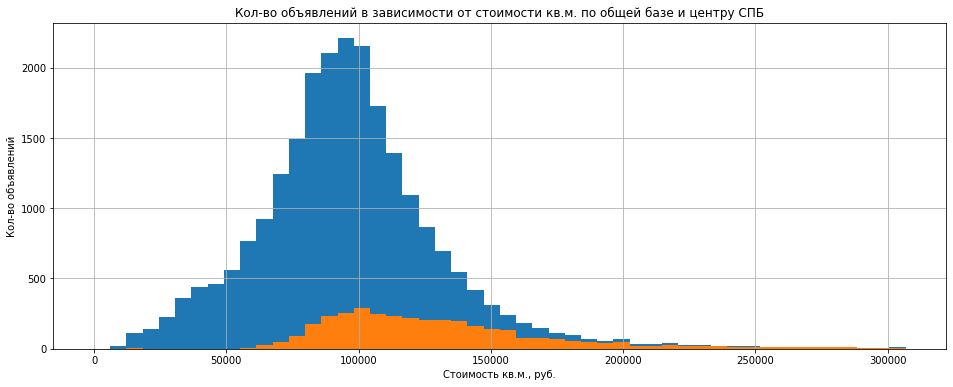

In [125]:
corr_df_spb_center('cost_square_meter', 'Кол-во объявлений в зависимости от стоимости кв.м. по общей базе и центру СПБ', 'Стоимость кв.м., руб.')

По гистограммам мы видим, что в общей базе объявлений по всем населенным пунктам, основная часть объявлений варьируется до 110000 руб. за кв.м. А в центре города от 80000 до 160000 руб. за кв.м.

Сформируем диаграму размаха по данным стоимости в центре города

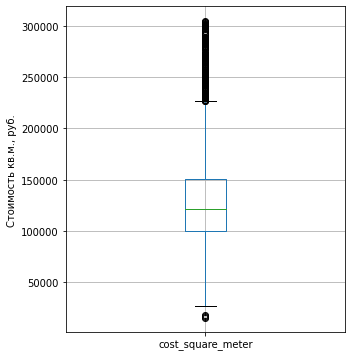

In [126]:
corr_box_df_spb_center('cost_square_meter', 'Стоимость кв.м., руб.')

#### Вывод

Основная часть объявлений на основании от 60000 до 240000 руб. за кв.м.

Стоит отметить, что по гистограмме можно увидеть странные предложения по цене, значительно отбивающиеся от основной массы. Это объявления со стоимостью за кв.м. от 10000 до 40000 руб. (можно даже отметить и до 50000 руб.)

#### Площадь квартир в центре СПБ

Сформируем основные показатели по столбцу общая площадь квартиры в центре

In [127]:
df_spb_center['total_area'].describe()

count   3728.00
mean      92.30
std       60.43
min       12.00
25%       56.00
50%       77.80
75%      108.70
max      900.00
Name: total_area, dtype: float64

Среднее и медианное значения отличаются друг от друга на 16%. Стоит отметить особо минимальная площадь в 11 кв.м. и максимальная в 900 кв.м.

Сформируем гистограмму по площади квартир из общей базы, для того, чтобы мы могли сравнить с данными из центра

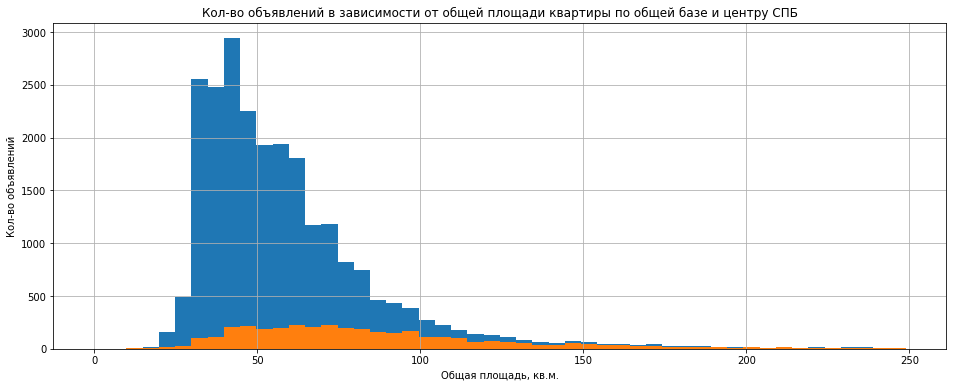

In [128]:
corr_df_spb_center('total_area', 'Кол-во объявлений в зависимости от общей площади квартиры по общей базе и центру СПБ', 'Общая площадь, кв.м.')

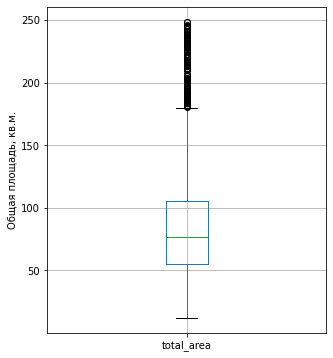

In [129]:
corr_box_df_spb_center('total_area', 'Общая площадь, кв.м.')

#### Вывод

Исходя из гистограмм и диаграммы видно, что в центре города, больше объявлений с большими площадями, чем объевлений во всей базе. Если в общей базе объявлений в основе квартиры с площадью от 30 до 75, то в цетре в основе превалируют квартиры от 40 до 120 кв.м. Основная же база по центру складывается из квартир с площадью от 20 до 180 кв.м.

#### Стоимость квартир в центре СПБ

Выведим общую инфомацию по столбцу `last_price`

In [130]:
df_spb_center['last_price'].describe()

count        3728.00
mean     14708082.16
std      24655968.56
min       1600000.00
25%       6550000.00
50%       9000000.00
75%      14102125.00
max     763000000.00
Name: last_price, dtype: float64

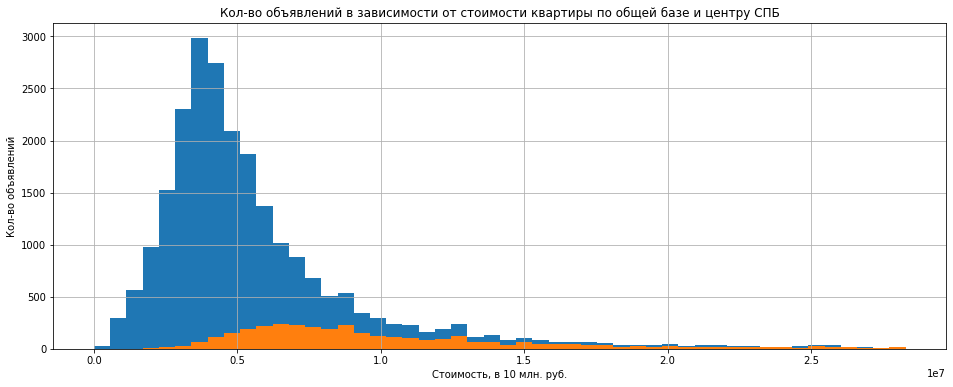

In [131]:
corr_df_spb_center('last_price', 'Кол-во объявлений в зависимости от стоимости квартиры по общей базе и центру СПБ', 'Стоимость, в 10 млн. руб.')

Создадим диаграмму размаха по центру города по данным общей стоимости квартиры.

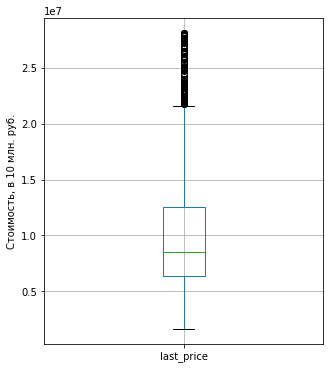

In [132]:
corr_box_df_spb_center('last_price', 'Стоимость, в 10 млн. руб.')

#### Вывод

Исходя из гистограмм и диаграммы видно, что в центре города, больше объявлений с большими стоимостями квартир, чем объевлений во всей базе. Если в общей базе объявлений в основе квартиры с площадью от 3000000 до 7000000 руб., то в цетре в основе превалируют квартиры от 4000000 до 13000000 руб. Основная же база по центру складывается из квартир с площадью от 2500000 до 22000000 кв.м.

#### Число комнат в квартирах в центре СПБ

Выведим основные показатели по столбцу `rooms` в центре города

In [133]:
df_spb_center['rooms'].describe()

count   3728.00
mean       2.81
std        1.45
min        0.00
25%        2.00
50%        3.00
75%        3.00
max       19.00
Name: rooms, dtype: float64

Средние и медианные значения немного отличаются, но не существенно.

Сформируем гистограмму по количеству объявлений по каждому значению кол-ва комнат в квартире по общей базе и центру города.

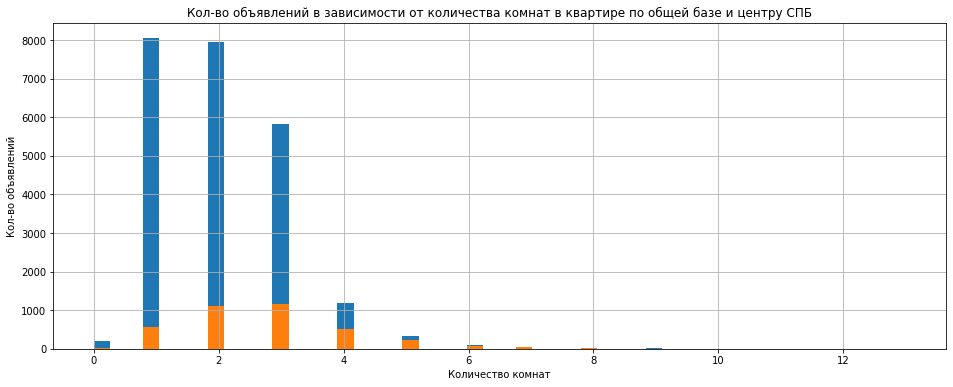

In [134]:
corr_df_spb_center('rooms', 'Кол-во объявлений в зависимости от количества комнат в квартире по общей базе и центру СПБ', 'Количество комнат')

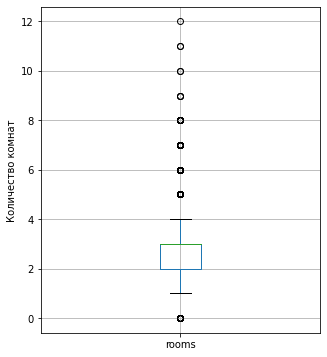

In [135]:
corr_box_df_spb_center('rooms', 'Количество комнат')

##### Вывод

Если по общей базе, основу составляют квартиры с 1, 2 и 3 комн. квартирами, то в цетре города уже основу составляют 2, 3 комнатные, а также 1, 4 и 5 комнатные. Т.е. в цетре склонность к многокомнатным квартирам.

#### Высота потолков в квартирах в центре СПБ

Выведим основные показатели столбца `ceiling_height` по центру СПБ

In [136]:
df_spb_center['ceiling_height'].describe()

count   3728.00
mean       2.89
std        0.75
min        2.00
25%        2.50
50%        2.80
75%        3.10
max       32.00
Name: ceiling_height, dtype: float64

Среднее и медианное значение отличаются не существенно.

Сформируем гистограмму по основной базе и центру.

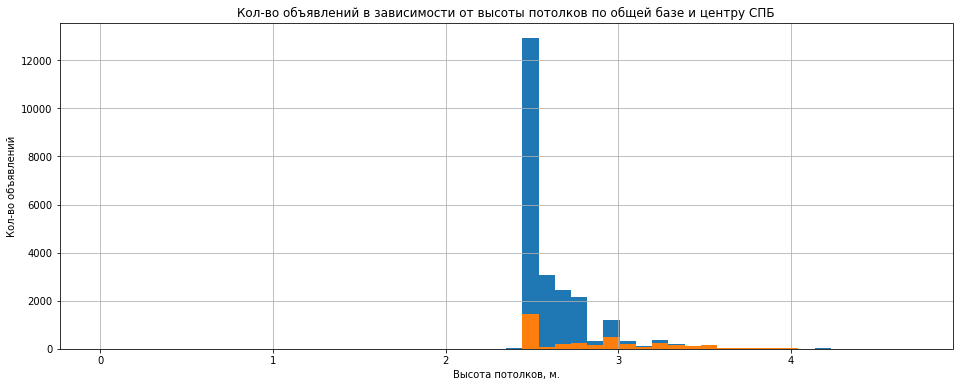

In [137]:
corr_df_spb_center('ceiling_height', 'Кол-во объявлений в зависимости от высоты потолков по общей базе и центру СПБ', 'Высота потолков, м.')

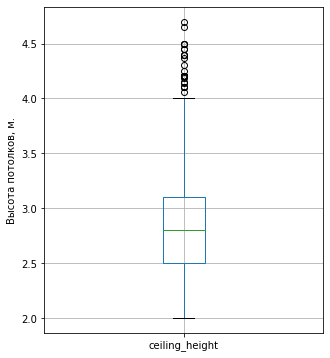

In [138]:
corr_box_df_spb_center('ceiling_height', 'Высота потолков, м.')

#### Вывод

По гистограммам и диаграмме, мы видим, что в цетре города относительно более высокие потолки в квартирах, чем по общей базе. Хорошо видно, например, что потолков до 2,6м. в общей базе много, а в центре города квартир с такими потолками мало.

### Факторы влияющие на стоимость квартиры

Как и в предыдущем исследовании, влияния разных факторов на стоимость, мы будет брать за основу влияние на стоимость квадратного метра.

Для работы со стоимостями за кв.м. создадим новый dataframe `df_spb_center_cost_metr`. В котором исключим бросовые значения по стоимости за кв.м. в центре, на основе данных из предыдущего исследования. Новый датафрейм постоим на основе датафрейма df_spb_center

In [139]:
df_spb_center_cost_metr = df_spb_center[(df_spb_center['cost_square_meter'] >= 50000) & (df_spb_center['cost_square_meter'] <= 250000)]

#### Влияние числа комнат на стоимость квартиры

Сформируем значение корреляции с помощью метода corr() не сгруппированных данных.

In [140]:
df_spb_center_cost_metr['rooms'].corr(df_spb_center_cost_metr['cost_square_meter'])

-0.20509982485283498

Значение показывае, что есть слабая отрицательная корреляция.

In [141]:
df_spb_center_cost_metr.groupby('rooms', as_index=False)['cost_square_meter'].mean().sort_values('cost_square_meter')

,rooms,cost_square_meter
15,19,86091.00
12,14,92827.00
8,8,104301.78
10,10,104828.50
14,16,105555.00
13,15,110169.00
5,5,112936.22
6,6,116659.77
4,4,117323.26
3,3,122661.56


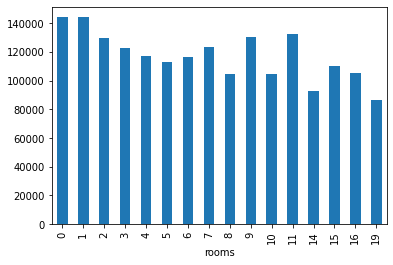

In [142]:
df_spb_center_cost_metr.groupby('rooms')['cost_square_meter'].mean().plot.bar(x='rooms', y='cost_square_meter');

In [143]:
df_spb_center_cost_metr.groupby('rooms', as_index=False)['cost_square_meter'].mean()['rooms'].corr(df_spb_center_cost_metr.groupby('rooms', as_index=False)['cost_square_meter'].mean()['cost_square_meter'])

-0.767703377535577

##### Вывод

Сгруппированные данные показывают нам то, что есть значительная отрицательная корреляция от количества комнат, до 6 комнат, в дальнейшем значения в основном скачут. Если смотреть по всей линейке по кол-ву комнат, включив выбросы, то есть существенные различия по стоимостям, с разницей в 70%.

#### Влияние этажа квартиры на ее стоимость

Сформируем значение корреляции с помощью метода corr() на сгруппированных данных.

In [144]:
df_spb_center_cost_metr['floor'].corr(df_spb_center_cost_metr['cost_square_meter'])

0.21402660296155063

Видим слабую положительную корреляциют.

Сформируем среднюю стоимость кв.м. по группа этажей

In [145]:
df_spb_center_cost_metr.groupby('floor_categ', as_index=False)['cost_square_meter'].mean()

,floor_categ,cost_square_meter
0,Другой,129841.49
1,Первый,113294.06
2,Последний,123400.15


<AxesSubplot:xlabel='floor_categ'>

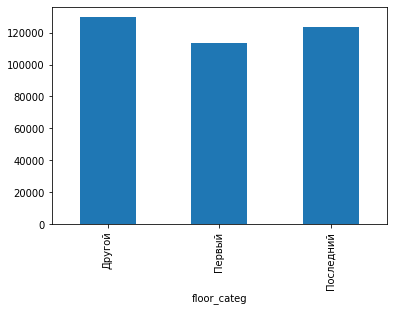

In [146]:
df_spb_center_cost_metr.groupby('floor_categ')['cost_square_meter'].mean().plot.bar(x='floor_categ', y='cost_square_meter')

Мы видим, что квартиры на первом этаже значительно уступают в стоимости по сравнению с другими и последним, также значения последнего этаже ниже, чем на других этажах.

Сформируем значения средней стоимости кв.м. по каждому этажу которые есть в базе и сформируем гистограмму 

In [147]:
df_spb_center_cost_metr.groupby('floor', as_index=False)['cost_square_meter'].mean()

,floor,cost_square_meter
0,1,113294.06
1,2,123967.27
2,3,125712.63
3,4,122085.57
4,5,125156.88
5,6,135770.49
6,7,142405.17
7,8,141283.74
8,9,145312.16
9,10,147100.65


<AxesSubplot:xlabel='floor'>

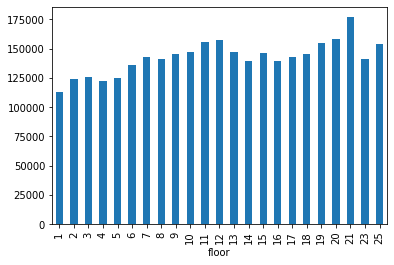

In [148]:
df_spb_center_cost_metr.groupby('floor')['cost_square_meter'].mean().plot.bar(x='floor', y='cost_square_meter')

Видим, что чем выше этаж, тем выше стоимость квартиры.

Для подтверждения сформируем коэффициент корреляции.

In [149]:
df_spb_center_cost_metr.groupby('floor', as_index=False)['cost_square_meter'].mean()['floor'].corr(df_spb_center_cost_metr.groupby('floor', as_index=False)['cost_square_meter'].mean()['cost_square_meter'])

0.7456534480643817

##### Вывод

Действительно, расчеты показали, что в центре города, чем выше этаж тем дороже квартира.

#### Влияние удаленности от центра на стоимость квартиры

Сформируем коэффициент корреляции

In [150]:
df_spb_center_cost_metr['city_centers_nearest_round'].corr(df_spb_center_cost_metr['cost_square_meter'])

0.044222120790303625

Коэффициент показывает, что в центре города нет корреляции от фактора удаленности от центра.

Выведим среднее значение стоимости кв.м. по каждому километру и сформируем гистограмму.

In [151]:
df_spb_center_cost_metr.groupby('city_centers_nearest_round', as_index=False)['cost_square_meter'].mean().sort_values('cost_square_meter')

,city_centers_nearest_round,cost_square_meter
3,4,118543.50
2,3,121473.48
7,8,125371.79
1,2,126451.38
4,5,128643.28
5,6,129636.44
6,7,132092.76
0,1,135385.54


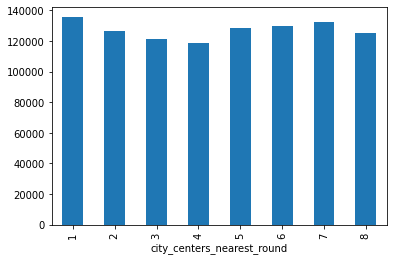

In [152]:
df_spb_center_cost_metr.groupby('city_centers_nearest_round')['cost_square_meter'].mean().plot.bar(x='city_centers_nearest_round', y='cost_square_meter');

##### Вывод

По сформированным данным, мы видим, что есть слабая корреляция фактора удаленности, но она не значительна. На 3-4 километре, стоимость кв.м. жилья немного ниже, чем на других "километрах" центра города.

#### Влияние дат размещения на стоимость квартиры

##### Влияние дня недели размещения на стоимость квартиры

Сформируем данные по дням недели, по общей базе, чтобы сравнить с данными по центру города.

In [153]:
df_cost.groupby('day_exposition', as_index=False)['cost_square_meter'].mean().sort_values('cost_square_meter', ascending=False)

,day_exposition,cost_square_meter
1,Вторник,95334.52
6,Четверг,95209.31
3,Пятница,94712.72
4,Среда,94655.98
5,Суббота,94478.31
2,Понедельник,94355.23
0,Воскресенье,94319.98


In [154]:
df_spb_center_cost_metr.groupby('day_exposition', as_index=False)['cost_square_meter'].mean().sort_values('cost_square_meter', ascending=False)

,day_exposition,cost_square_meter
0,Воскресенье,130929.04
2,Понедельник,128850.39
4,Среда,128113.57
5,Суббота,128065.74
3,Пятница,127073.34
6,Четверг,125102.53
1,Вторник,123612.22


Сформируем гистограммы на основе полученных данных

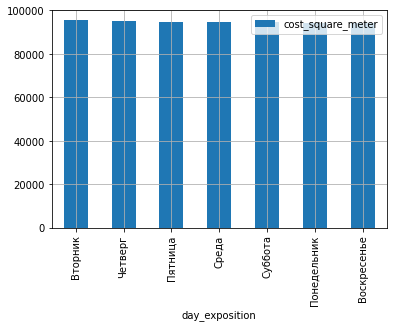

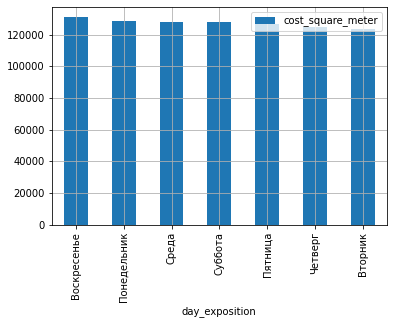

In [155]:
df_cost.groupby('day_exposition', as_index=False)['cost_square_meter'].mean().sort_values('cost_square_meter', ascending=False).plot.bar(x='day_exposition', y='cost_square_meter', grid=True);
df_spb_center_cost_metr.groupby('day_exposition', as_index=False)['cost_square_meter'].mean().sort_values('cost_square_meter', ascending=False).plot.bar(x='day_exposition', y='cost_square_meter', grid=True);

##### Вывод

Данные показывают, что нет каких либо корреляций от дня недели размещения рекламы на стоимость кв.м.

##### Влияние месяца размещения на стоимость квартиры

Сформируем данные по месяцам по общей базе, чтобы сравнить с данными по центру города.

In [156]:
df_cost.groupby('month_exposition', as_index=False)['cost_square_meter'].mean().sort_values('cost_square_meter', ascending=False)

,month_exposition,cost_square_meter
0,Август,95862.97
1,Апрель,95463.41
3,Июль,95385.67
6,Март,95333.30
9,Сентябрь,95063.82
7,Ноябрь,94642.92
11,Январь,94580.66
10,Февраль,94506.65
8,Октябрь,94505.74
2,Декабрь,94458.83


Сформируем данные по месяцам по базе центра города.

In [157]:
df_spb_center_cost_metr.groupby('month_exposition', as_index=False)['cost_square_meter'].mean().sort_values('cost_square_meter', ascending=False)

,month_exposition,cost_square_meter
6,Март,130432.40
11,Январь,129408.11
1,Апрель,128477.07
0,Август,127806.21
9,Сентябрь,127720.79
7,Ноябрь,127460.34
10,Февраль,126729.58
3,Июль,126722.01
5,Май,124945.99
8,Октябрь,124045.86


Сформируем гистограммы на основе полученных данных

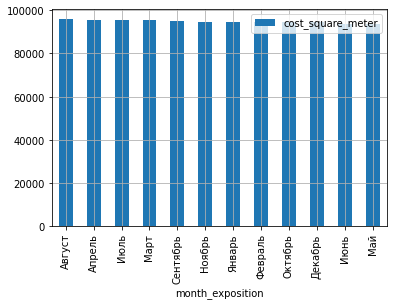

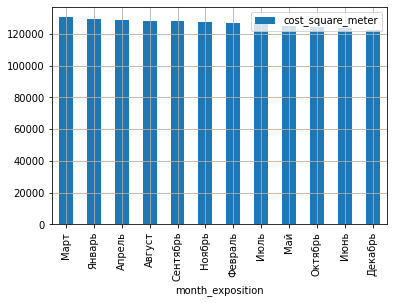

In [158]:
df_cost.groupby('month_exposition', as_index=False)['cost_square_meter'].mean().sort_values('cost_square_meter', ascending=False).plot(x='month_exposition', y='cost_square_meter', kind='bar', grid=True);
df_spb_center_cost_metr.groupby('month_exposition', as_index=False)['cost_square_meter'].mean().sort_values('cost_square_meter', ascending=False).plot(x='month_exposition', y='cost_square_meter', kind='bar', grid=True);

##### Вывод

Если по общей базе все "ровно", то в центре есть очень слабая корреляция от влияния месяца размещения объявления на стоимость кв.м. В марте, январе, апреле стоимость кв.м. немного выше, чем в другие месяцы.

##### Влияние года размещения на стоимость квартиры

Сформируем данные по годам по общей базе, чтобы сравнить с данными по центру города.

In [159]:
df_cost.groupby('year_exposition', as_index=False)['cost_square_meter'].mean().sort_values('cost_square_meter', ascending=False)

,year_exposition,cost_square_meter
0,2014,100867.56
5,2019,100765.40
4,2018,95915.36
1,2015,93239.47
3,2017,92663.17
2,2016,92420.58


Сформируем данные по годам, по базе центра города.

In [160]:
df_spb_center_cost_metr.groupby('year_exposition', as_index=False)['cost_square_meter'].mean().sort_values('cost_square_meter', ascending=False)

,year_exposition,cost_square_meter
5,2019,136013.00
0,2014,129383.11
4,2018,128801.58
3,2017,125597.59
2,2016,122368.38
1,2015,120890.33


Сформируем гистограммы по полученным данным.

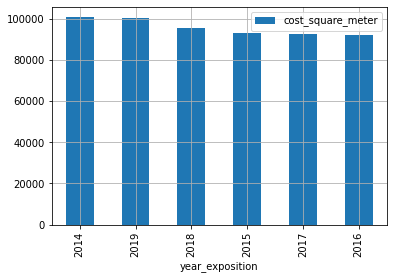

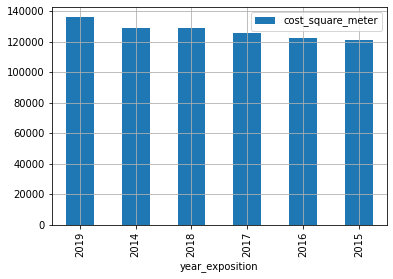

In [161]:
df_cost.groupby('year_exposition', as_index=False)['cost_square_meter'].mean().sort_values('cost_square_meter', ascending=False).plot(x='year_exposition', y='cost_square_meter', kind='bar', grid=True);
df_spb_center_cost_metr.groupby('year_exposition', as_index=False)['cost_square_meter'].mean().sort_values('cost_square_meter', ascending=False).plot(x='year_exposition', y='cost_square_meter', kind='bar', grid=True);

##### Вывод

По рассчетам видно, что 2015, 2016 значительно "проседали" по стоимости чуть более 10%, но к 2019 году, стоимость почти восстановилась и приблизилась к значению 2014 года. Но корреляция от года всеже сомнительная.

## Общий вывод

Мы провели большую работу по обработке данных, добавили и категоризировали необходимые показатели, провели исследовательский анализ, выявили зависимости как по общим данным, так и центру города Санкт-Петербург.

Можно с уверенностью сказать, что влияния факторов на стоимость квартир, значительно различается в центре города Санкт-Петербург от общей базы.

По общей базе:
От площади – есть незначительная корреляция, значения от 28 до 85 кв.м. несколько ниже, чем до и после, в некоторых значениях есть серьезный "отрыв" в крайних значениях в 50%
От числа комнат – есть небольшая зависимость от количества комнат. В студиях и однокомнатных стоимость кв.м. дороже чем в 2, 3  и 4 ком.кв. Самая низкая у 3х комнатных. Без учета выбросов. 
От удаленности от центра – есть явно выраженная отрицательная корреляция, кроме значений до 8 км от центра. Снижение стоимости кв.м. при удаленности от центра. Стоит отметить, что явно проглядываются "взрывы" стоимости на 54 и 59 км.
От этажа квартиры – есть слабая зависимость, однако выделяется первый и последний этаж, на них стоимость кв.м. жилья значительно ниже в особенности на первом.
От даты размещения:
Дня недели – не наблюдается
Месяца – не наблюдается
Года – не наблюдается. Однако есть проседания по 2015, 2016, 2017 годам.

Центр города Санкт-Петербурга можно считать все, что входит до 8 км. включительно.
По центру города:
От числа комнат - есть значительная отрицательная корреляция от количества комнат, до 6 комнат, в дальнейшем значения в основном скачут. Если смотреть по всей линейке по кол-ву комнат, включив выбросы, то есть существенные различия по стоимостям, с разницей в 70%.
От удаленности от центра - есть слабая корреляция фактора удаленности, но она не значительна. На 3-4 километре, стоимость кв.м. жилья немного ниже, чем на других "километрах" центра города.
От этажа квартиры - квартиры на первом этаже значительно уступают в стоимости по сравнению с другими и последним, также значения последнего этаже ниже, чем на других этажах. А также чем выше этаж тем дороже квартира.
От даты размещения:
Дня недели - не наблюдается
Месяца - не наблюдается
Года - не наблюдается. Однако есть проседания по 2015, 2016, 2017 годам.

Можно считать, что если квартира продалась до 7 дней, то это очень быстро, если более 460 дней это уже необычно долго. Нормальным можно считать срок до 210 дней.

Выбирая между населенными пунктами, в первой десятке населенных пунктов с самым большим кол-вом объявлений, самая дорогая стоимость кв.м. в Санкт-Петербурге, Пушкине и деревне Кудрово, а самая дешевая в Выборге, Всеволожске и в Гатчине.